# Imports

In [10]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime
import seaborn as sns
import statsmodels.api as sm
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA, ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
import plot_hci
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity


#pmdarima
from pmdarima import auto_arima 
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")




df_a = pd.read_csv('Data/app-store-apple-data-set-10k-apps/AppleStore.csv')
#df_a.set_index('id', inplace=True)
df_a.drop(columns='Unnamed: 0', inplace=True)
df_a_d = pd.read_csv('Data/app-store-apple-data-set-10k-apps/appleStore_description.csv')
df_a_all = df_a.join(df_a_d, how='right', lsuffix='id')
df_a_all.drop(columns=['idid', 'track_nameid', 'size_bytesid'], inplace=True)
df_g = pd.read_csv('Data/google-play-store-apps/googleplaystore.csv')
df_g_d = pd.read_csv('Data/google-play-store-apps/googleplaystore_user_reviews.csv')


In [42]:
df_a.columns , df_g.columns

(Index(['track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot',
        'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver',
        'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num',
        'lang.num', 'vpp_lic'],
       dtype='object'),
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
        'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
        'Android Ver'],
       dtype='object'))

In [98]:
np.where(np.array(df_a.track_name) == np.array(df_g.App))

(array([], dtype=int64),)

In [121]:
df_a.shape

(7197, 16)

In [126]:
df_g.columns, df_g_d.columns

(Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
        'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
        'Android Ver', 'ContentRatingValue'],
       dtype='object'),
 Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
        'Sentiment_Subjectivity'],
       dtype='object'))

In [123]:
df_a_all.columns


In [127]:
df_a_all.columns

Index(['currency', 'price', 'rating_count_tot', 'rating_count_ver',
       'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'id',
       'track_name', 'size_bytes', 'app_desc'],
      dtype='object')

## df_pa df_pg

In [11]:
df_pa = df_a_all[['track_name', 'size_bytes', 'rating_count_tot', 'user_rating', 'prime_genre', 'price']]
df_pg = df_g[['App', 'Size', 'Rating', 'Reviews', 'Genres', 'Price']]

In [164]:
top_genres_list = []
# for x, y in :
#     print(x)
#     print(y)
#     break
a = df_pg.Genres.value_counts().head(20)
    

In [308]:
df_g.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,ContentRatingValue,target,Label,LabelGenre,Label2,Top5,Top10,GenreNum,Top30,2Top10
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,...,0,0.672669,13,-1,21,2,3,37,21,3
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,0,0.608643,11,-1,3,0,0,91,3,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000,Free,0.0,Everyone,Art & Design,...,0,0.883954,3,-1,27,0,0,37,27,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000,Free,0.0,Teen,Art & Design,...,1,0.810324,0,-1,14,2,3,37,14,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,...,0,0.739896,1,-1,17,0,5,63,17,5


In [169]:
for i in a.index:
    top_genres_list.append(i)

In [175]:
df_pg.loc[df_pg['Genres'].isin(top_genres_list)]

,App,Size,Rating,Reviews,Genres,Price
139,Wattpad 📖 Free Books,2.151418e+07,4.6,2914724.0,Books & Reference,0.0
140,E-Book Read - Read Book for free,4.900000e+06,4.5,1857.0,Books & Reference,0.0
141,Download free book with green book,9.500000e+06,4.6,4478.0,Books & Reference,0.0
142,Wikipedia,2.151418e+07,4.4,577550.0,Books & Reference,0.0
143,Amazon Kindle,2.151418e+07,4.2,814080.0,Books & Reference,0.0
...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,5.300000e+07,4.5,38.0,Education,0.0
10837,Fr. Mike Schmitz Audio Teachings,3.600000e+06,5.0,4.0,Education,0.0
10838,Parkinson Exercices FR,9.500000e+06,-1.0,3.0,Medical,0.0
10839,The SCP Foundation DB fr nn5n,2.151418e+07,4.5,114.0,Books & Reference,0.0


In [12]:
col_names = {'track_name' : 'App',
            'size_bytes' : 'Size',
            'rating_count_tot' : 'Reviews',
            'user_rating' : 'Rating',
            'prime_genre' : 'Genres',
            'price' : 'Price'}
df_pa.rename(col_names, inplace=True)

In [138]:
df_pa.head()

,track_name,size_bytes,rating_count_tot,user_rating,prime_genre,price
0,PAC-MAN Premium,100788224,21292,4.0,Games,3.99
1,Evernote - stay organized,158578688,161065,4.0,Productivity,0.00
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,188583,3.5,Weather,0.00
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,262241,4.0,Shopping,0.00
4,Bible,92774400,985920,4.5,Reference,0.00


In [139]:
df_pg.head()

,App,Size,Rating,Reviews,Genres,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,19000000.0,4.1,159.0,Art & Design,0.0
1,Coloring book moana,14000000.0,3.9,967.0,Art & Design;Pretend Play,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",8700000.0,4.7,87510.0,Art & Design,0.0
3,Sketch - Draw & Paint,25000000.0,4.5,215644.0,Art & Design,0.0
4,Pixel Draw - Number Art Coloring Book,2800000.0,4.3,967.0,Art & Design;Creativity,0.0


In [130]:
list(sorted(df_g['Rating'].unique()))

[-1.0,
 1.0,
 1.2,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 19.0]

In [135]:
df_g[df_g['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ContentRatingValue


In [132]:
list(sorted(df_a['user_rating'].unique()))

[0.0, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Clean Datasets

## Methods

### removeplus

In [13]:
def removeplus(x):
    if type(x) == str:
        parts = x.split('+')
        try:
            return int(parts[0])
        except:
            nums = parts[0].split(',')
            final = ''
            for num in nums:
                final += num
            return int(nums[0] + nums[1])
    else:
        return x

### separateLetters

In [14]:
import re
#returns number only
#to do list: apply value of letter to number
def separateLetters(x):
    if x == 'Varies with Device': #only letters
        return np.nan
    reg = re.compile("([0-9.]+)([a-zA-Z]+)") #numbers first
    reg2 = re.compile('([a-zA-Z]+)([0-9]+)') #letters first
    f = None
    try:
        #numbers first
        res = reg.match(x).groups()
        f = (float(res[0]), res[1])
    except:
        #print('in exception of numbers first')
        try:
            res = reg2.match(x).groups()
            #print('in letters first')
            #have to flip tuple
            f = (float(res[1]), res[0])
        except:
            #only numbers or letters
            #print('in exception of letters first')
            if x.isdigit(): #only numbers
                return float(x)
            else: #not convertible
                print('different combination of letters and numbers: {}'.format(x))
                return x
    #res[0] = number, res[1], letter
    if f[1] == 'k': #kilo
        return (f[0] * 1000)
    elif f[1] == 'M': #1e6
        return (f[0] * 1000000)
    else:
        print('different letter, pls update : {}'.format(f[1]))
        return f[0]
print(separateLetters('Varies with Device'))

nan


### dropdollarsign

In [15]:
def dropdollarsign(x):
    if (x[0] == '$'):
        return x[1:]
    else:
        return x

### versionToDecimal

In [16]:
def versionToDecimal(x):
    if (type(x) == str):
        #take minimum of version range
        if ('-' in x):
            x = x.split(' - ')[0]
        #remove and up to take mimimum
        x = x.replace(' and up', '')
        #split multiple decimals
        #only use first
        if '.' in x:
            parts = x.split('.')
            final = parts[0] + '.' + parts[1]
            for part in parts[2:]:
                final += part
            return final
        else:
            return x
    else:
        return x

## testCluster - X, n, name, df_g, genre

In [30]:
#returns list of top genres per number of clusters sent
def testCluster(X, n = 30, name = 'Label', df_g=df_g, genre='Genres'):
    agc = AgglomerativeClustering(n_clusters = n)
    agc_minmax = agc.fit(X)
    df_g[name] = agc_minmax.labels_
    
    glist = []
    for i in range(n):
        df_gCur = df_g[df_g[name] == i]
        label = df_gCur[genre].value_counts().index[0]
        glist.append(label)
    return glist

In [17]:
df_g[df_g.Size == 'Varies with device'].shape

(1695, 13)

In [18]:
df_g[df_g.Size  < 0.01]['Size'].shape

TypeError: '<' not supported between instances of 'str' and 'float'

count    9.146000e+03
mean     2.151418e+07
std      2.258863e+07
min      1.000000e+03
25%      4.900000e+06
50%      1.300000e+07
75%      3.000000e+07
max      1.000000e+08
Name: Size, dtype: float64

## Calls

### Google

In [19]:
df_a_all['cont_rating'] = df_a_all['cont_rating'].apply(removeplus)

In [20]:
df_g.Size.dtypes

dtype('O')

In [21]:
#Size
df_g.Size = df_g.Size.apply(separateLetters)
df_g.Size.replace(to_replace='1,000+', value=1000, inplace=True)
df_g.Size.replace(to_replace='Varies with device', value=0.00001, inplace=True)
df_g.Size = df_g.Size.apply(lambda x: float(x))
df_g.Size.replace(to_replace=0.00001 ,value=df_g[df_g.Size  > 0.01]['Size'].mean(), inplace=True)


#reviews
# be sure to add the letters value to the number
print('Reviews')
df_g['Reviews'] = df_g['Reviews'].apply(separateLetters)

#Rating
df_g['Rating'].fillna(0.001, inplace=True)
df_g_na = df_g[df_g['Rating'] < 0]
df_g.drop(index=10472, inplace=True) #df_g['Rating'] > 5
#installs

df_g.Installs.replace(to_replace='Free', value='0,0', inplace=True )
df_g.Installs.replace(to_replace='0', value='0,0', inplace=True )
df_g.Installs = df_g.Installs.apply(removeplus)

#type - 'Paid' / 'Free'
df_g.Type.replace(to_replace='0', value='Free', inplace=True)

#price
df_g.Price.replace(to_replace='Everyone', value='0', inplace=True)
df_g.Price = df_g.Price.apply(dropdollarsign)
df_g.Price = df_g.Price.apply(lambda x: float(x))

#content rating
content_rating_dict = {
    'Everyone' : 0,
    'Teen' : 1,
    'Everyone 10+' : 2,
    'Mature 17+' : 3,
    'Adults only 18+' : 4,
    'Unrated': 5
}
df_g['ContentRatingValue'] = df_g['Content Rating'].replace(content_rating_dict)

#last updated
df_g['Last Updated'] = pd.to_datetime(df_g['Last Updated'], format='%B %d, %Y', errors='coerce')



different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of 

In [22]:
df_g['Content Rating']

0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10836      Everyone
10837      Everyone
10838      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 10840, dtype: object

In [23]:
df_g.dtypes

App                           object
Category                      object
Rating                       float64
Reviews                      float64
Size                         float64
Installs                       int64
Type                          object
Price                        float64
Content Rating                object
Genres                        object
Last Updated          datetime64[ns]
Current Ver                   object
Android Ver                   object
ContentRatingValue             int64
dtype: object

### Apple

In [2]:
df_a.shape, df_a_d.shape , df_g.shape, df_g_d.shape

((7197, 17), (7197, 4), (10841, 13), (64295, 5))

In [3]:
df_g.columns , df_g_d.columns

(Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
        'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
        'Android Ver'],
       dtype='object'),
 Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
        'Sentiment_Subjectivity'],
       dtype='object'))

# Apple

In [4]:
df_a.columns, df_a_d.columns

(Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
        'rating_count_tot', 'rating_count_ver', 'user_rating',
        'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
        'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
       dtype='object'),
 Index(['id', 'track_name', 'size_bytes', 'app_desc'], dtype='object'))

In [24]:
df_a_d.shape

(7197, 4)

In [2]:
df_a.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [23]:
df_a_d.set_index('id', inplace=True)
df_a.set_index('id', inplace=True)

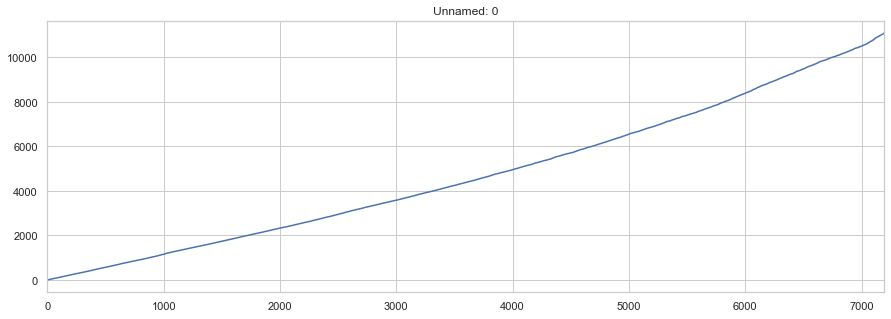

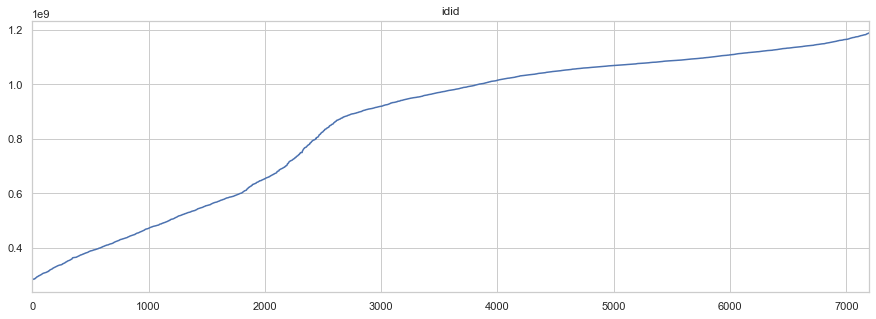

could not graph: track_nameid


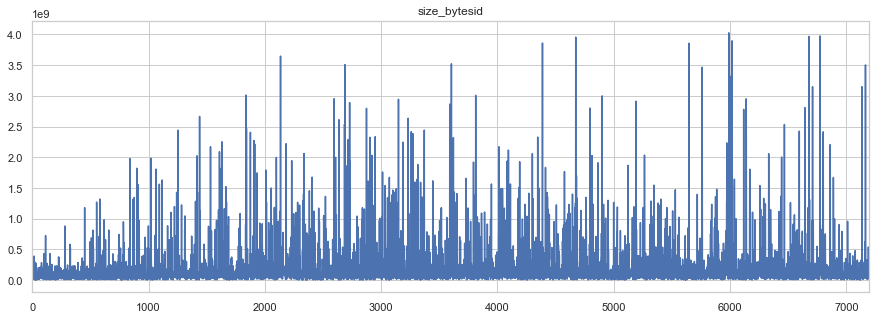

could not graph: currency


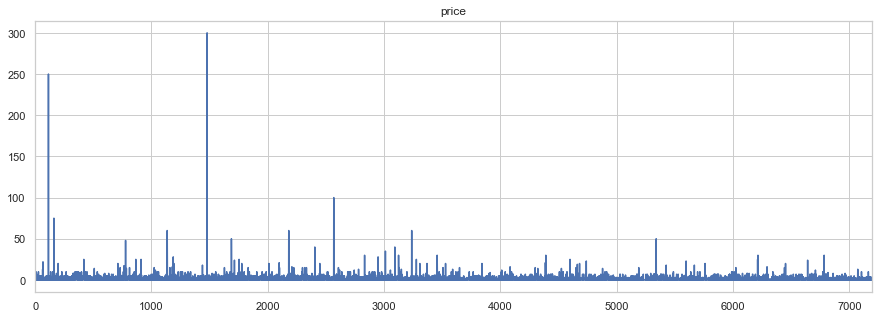

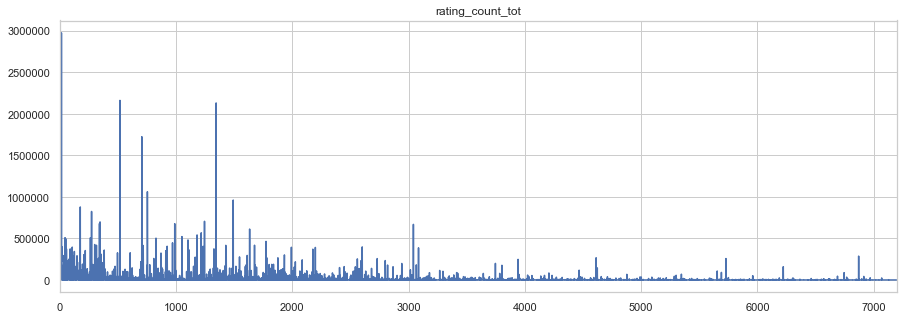

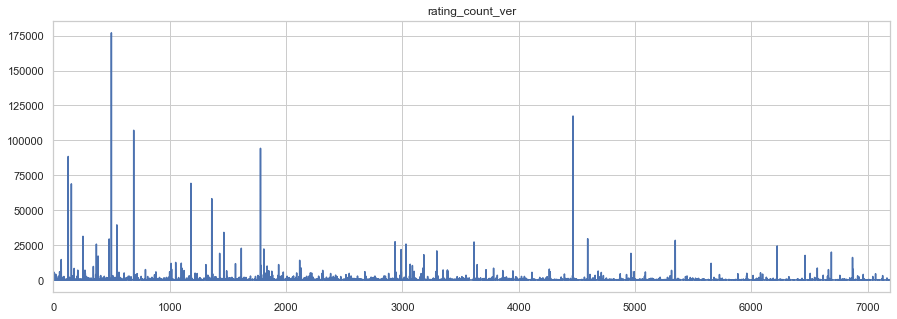

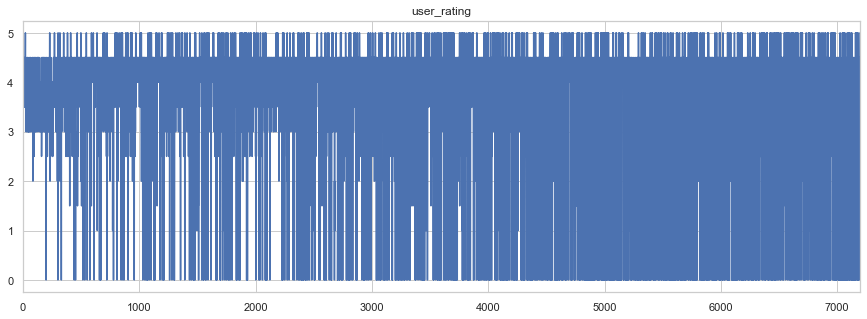

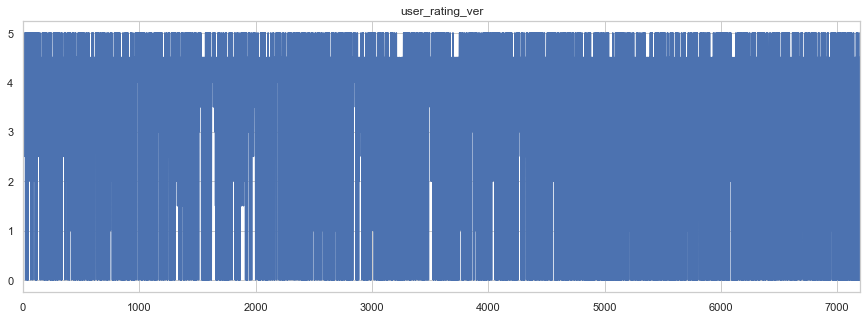

could not graph: ver


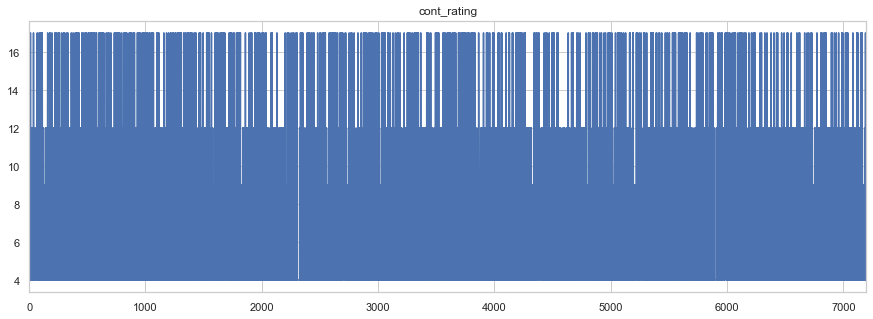

could not graph: prime_genre


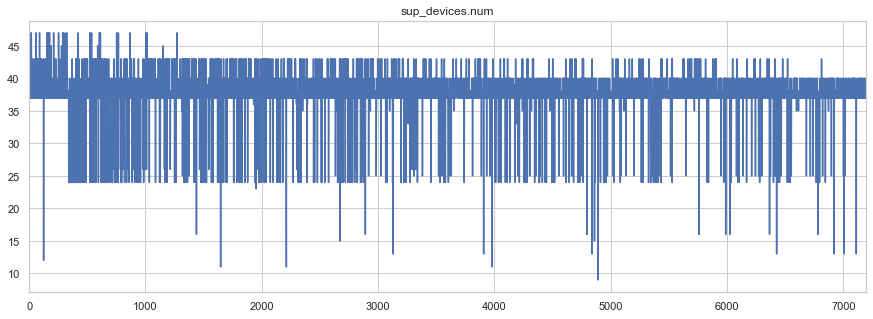

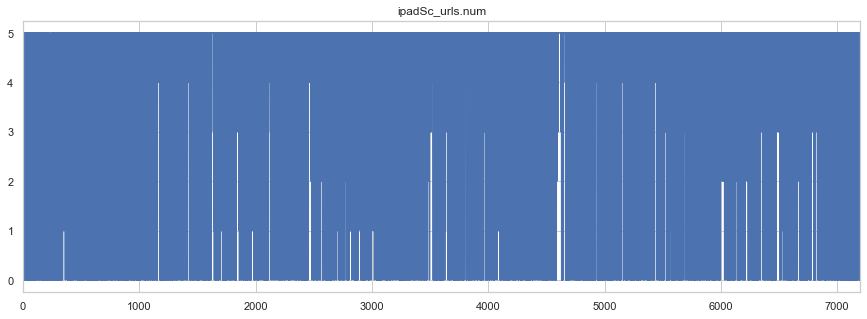

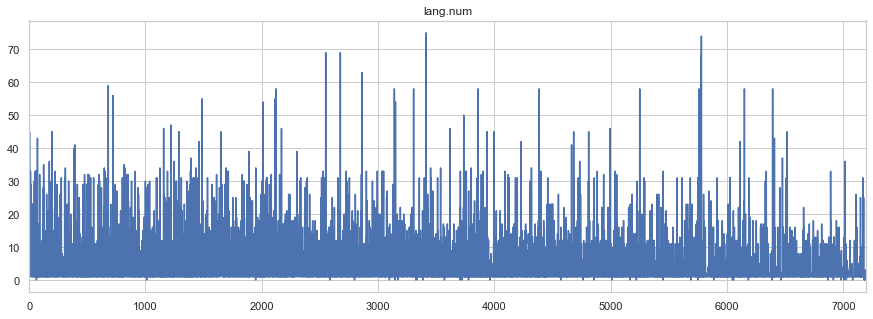

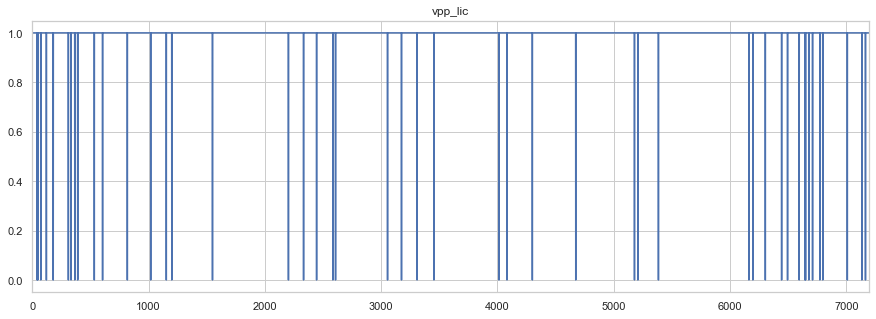

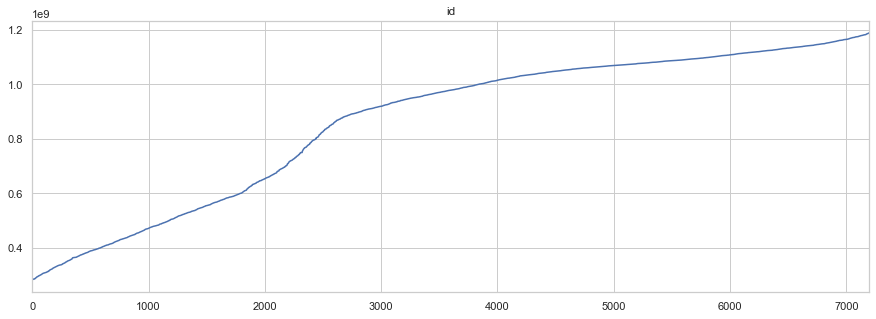

could not graph: track_name


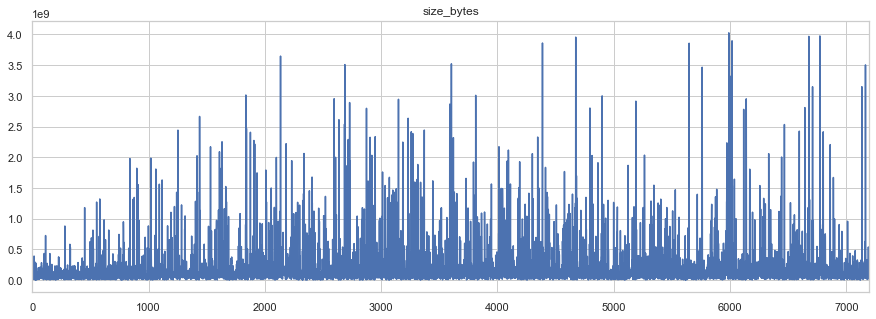

could not graph: app_desc


In [63]:
nograph = []
for d in df_a_all.columns:
    try:
        df_a_all[d].plot(figsize=(15, 5))
        plt.title(d)
        plt.show()
    except:
        print('could not graph: {}'.format(d))
        nograph.append(d)
        continue

In [9]:
nograph

['track_nameid',
 'currency',
 'ver',
 'cont_rating',
 'prime_genre',
 'track_name',
 'app_desc']

In [9]:
df_a_all.columns , df_a.columns, df_a_d.columns

(Index(['Unnamed: 0', 'idid', 'track_nameid', 'size_bytesid', 'currency',
        'price', 'rating_count_tot', 'rating_count_ver', 'user_rating',
        'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
        'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'id',
        'track_name', 'size_bytes', 'app_desc'],
       dtype='object'),
 Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
        'rating_count_tot', 'rating_count_ver', 'user_rating',
        'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
        'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
       dtype='object'),
 Index(['id', 'track_name', 'size_bytes', 'app_desc'], dtype='object'))

In [64]:
df_a_all2 = df_a_all.drop(columns=['Unnamed: 0', 'idid', 'track_nameid', 'size_bytesid'])

In [65]:
df_a_all2.columns

Index(['currency', 'price', 'rating_count_tot', 'rating_count_ver',
       'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'id',
       'track_name', 'size_bytes', 'app_desc'],
      dtype='object')

# apple all pairplot graph

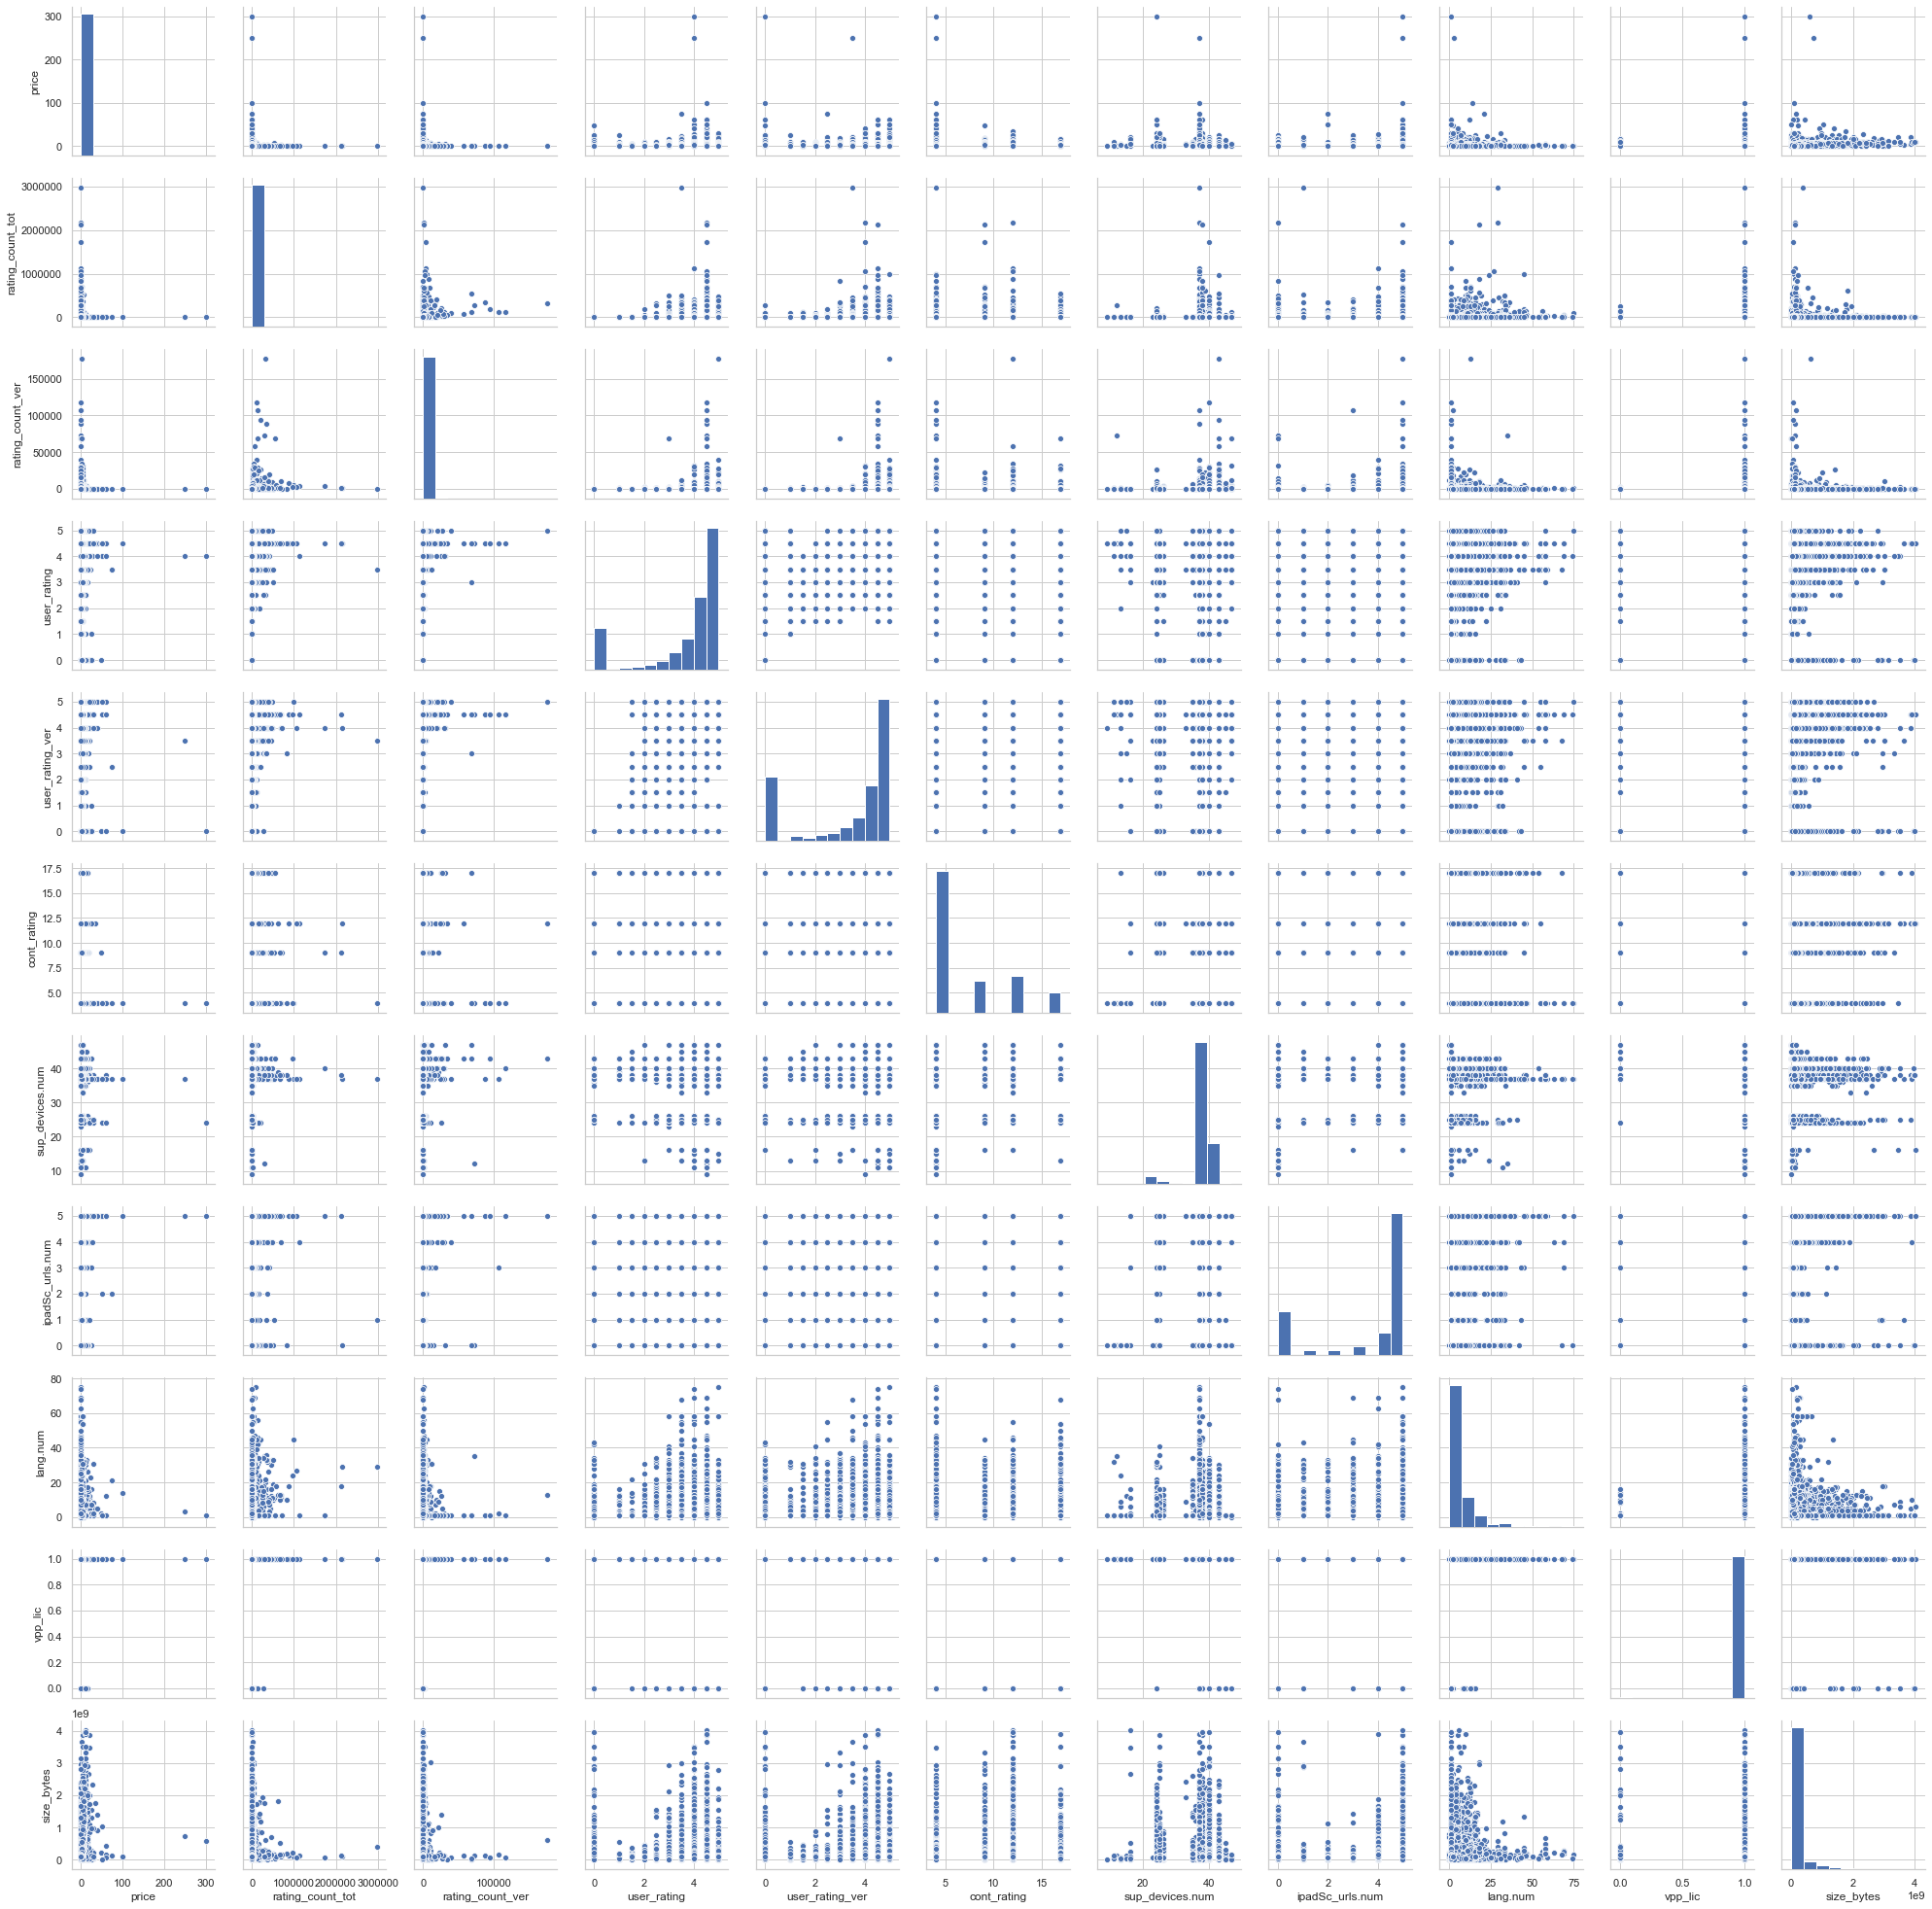

In [95]:
sns.pairplot(df_a_all2.drop(columns=['id']))

In [10]:
df_a_all.columns

Index(['Unnamed: 0', 'idid', 'track_nameid', 'size_bytesid', 'currency',
       'price', 'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'id',
       'track_name', 'size_bytes', 'app_desc'],
      dtype='object')

In [11]:
for d in nograph:
    print('column name: {}'.format(d))
    print(df_a_all[d][0])
    print('\n')

column name: track_nameid
PAC-MAN Premium


column name: currency
USD


column name: ver
6.3.5


column name: cont_rating
4+


column name: prime_genre
Games


column name: track_name
PAC-MAN Premium


column name: app_desc
SAVE 20%, now only $3.99 for a limited time!

One of the most popular video games in arcade history!
2015 World Video Game Hall of Fame Inductee

Who can forget the countless hours and quarters spent outrunning pesky ghosts and chompin’ on dots? Now you can have the same arcade excitement on your mobile devices! 
Guide PAC-MAN through the mazes with easy swipe controls, a MFi controller, or kick it old school with the onscreen joystick!
Eat all of the dots to advance to the next stage. Go for high scores and higher levels! Gain an extra life at 10.000 points! Gobble Power Pellets to weaken ghosts temporarily and eat them up before they change back. Avoid Blinky, the leader of the ghosts, and his fellow ghosts Pinky, Inky, and Clyde, or you will lose a life. It’s gam

In [ ]:
# appleStore.csv

# "id" : App ID
# "track_name": App Name
# "size_bytes": Size (in Bytes)
# "currency": Currency Type
# "price": Price amount
# "ratingcounttot": User Rating counts (for all version)
# "ratingcountver": User Rating counts (for current version)
# "user_rating" : Average User Rating value (for all version)
# "userratingver": Average User Rating value (for current version)
# "ver" : Latest version code
# "cont_rating": Content Rating
# "prime_genre": Primary Genre
# "sup_devices.num": Number of supporting devices
# "ipadSc_urls.num": Number of screenshots showed for display
# "lang.num": Number of supported languages
# "vpp_lic": Vpp Device Based Licensing Enabled

In [ ]:
#further exploration
#user rating, user rating ver, sup_devices.num, ipadSc_urls.num, lang.num, vpp_llc
#user rating vs user rating ver
#average rating overall compared to current user rating of newest version
#



In [15]:
df_a_all.head()

,Unnamed: 0,idid,track_nameid,size_bytesid,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,...,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,id,track_name,size_bytes,app_desc
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,...,4+,Games,38,5,10,1,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,...,4+,Productivity,37,5,23,1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,...,4+,Weather,37,5,3,1,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,...,12+,Shopping,37,5,9,1,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,...,4+,Reference,37,5,45,1,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [12]:
df_a_all['cont_rating'].unique()

array(['4+', '12+', '17+', '9+'], dtype=object)

In [26]:
int(df_a_all['cont_rating'][3].split('+')[0])

12

In [ ]:
#vpp_llc
#allows for multiple device usage without apple ID
#you can share the app between different people ?
#https://www.jamf.com/jamf-nation/articles/418/moving-from-user-to-device-based-volume-purchasing-assignments

In [138]:
list(range(3, -1))

[]

# Google

In [66]:
df_g.shape, df_g_d.shape

((10841, 13), (64295, 5))

In [67]:
df_g['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [166]:
df_g.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
df_g.isna().sum()[2]

1474

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,-1.0,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,-1.0,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,-1.0,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,-1.0,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,-1.0,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,-1.0,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,-1.0,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,-1.0,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,-1.0,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [167]:
df_g_d.App.unique().size

1074

In [168]:
app_counts = {}
for x in df_g.App:
    count = 0
    for y in df_g_d.App:
        if x == y:
            count += 1
    app_counts[x] = count

KeyboardInterrupt: 

In [ ]:
app_counts.values

In [ ]:
#how many reviews in df_g_d for the app in df_g

In [49]:
app_counts

{'Photo Editor & Candy Camera & Grid & ScrapBook': 0,
 'Coloring book moana': 58,
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps': 0,
 'Sketch - Draw & Paint': 0,
 'Pixel Draw - Number Art Coloring Book': 0,
 'Paper flowers instructions': 0,
 'Smoke Effect Photo Maker - Smoke Editor': 0,
 'Infinite Painter': 0,
 'Garden Coloring Book': 100,
 'Kids Paint Free - Drawing Fun': 0,
 'Text on Photo - Fonteee': 0,
 'Name Art Photo Editor - Focus n Filters': 0,
 'Tattoo Name On My Photo Editor': 0,
 'Mandala Coloring Book': 0,
 '3D Color Pixel by Number - Sandbox Art Coloring': 40,
 'Learn To Draw Kawaii Characters': 0,
 'Photo Designer - Write your name with shapes': 0,
 '350 Diy Room Decor Ideas': 0,
 'FlipaClip - Cartoon animation': 40,
 'ibis Paint X': 0,
 'Logo Maker - Small Business': 0,
 "Boys Photo Editor - Six Pack & Men's Suit": 40,
 'Superheroes Wallpapers | 4K Backgrounds': 0,
 'Mcqueen Coloring pages': 0,
 'HD Mickey Minnie Wallpapers': 0,
 'Harley Quinn wallpapers HD': 0,
 

In [54]:
nums = 0
for x in app_counts.values():
    if (x > 0):
        nums += 1

In [57]:
nums, sum(app_counts.values())

(1020, 61556)

In [38]:
df_g_d.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [40]:
df_g_d.shape

(64295, 5)

In [ ]:
def addTranslatedReviews(x)

In [68]:
df_g_groupbyApp = df_g_d.groupby('App').sum()

In [22]:
df_g_groupbyApp.shape

(1074, 2)

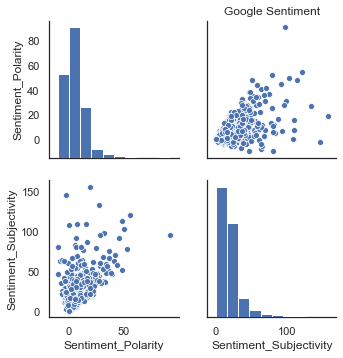

In [115]:
sns.pairplot(df_g_groupbyApp)
plt.title('Google Sentiment')
plt.show()

In [23]:
df_g_d.groupby('App').mean()

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
10 Best Foods for You,0.470733,0.495455
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
11st,0.181294,0.443957
1800 Contacts - Lens Store,0.318145,0.591098
1LINE – One Line with One Touch,0.196290,0.557315
...,...,...
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.251765,0.393284
Hotstar,0.038178,0.493964
Hotwire Hotel & Car Rental App,0.187029,0.459717


In [24]:
df_g_d.groupby('App').count()

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
10 Best Foods for You,194,194,194,194
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,40,40,40,40
11st,39,40,40,40
1800 Contacts - Lens Store,80,80,80,80
1LINE – One Line with One Touch,38,38,38,38
...,...,...,...,...
Hotspot Shield Free VPN Proxy & Wi-Fi Security,34,34,34,34
Hotstar,32,32,32,32
Hotwire Hotel & Car Rental App,33,33,33,33


In [216]:
df_g_d.groupby('App').mean().shape

(1074, 2)

In [215]:
df_g_d.shape, df_g.shape

((64295, 5), (10841, 13))

In [214]:
df_g_d.columns, df_g.columns

(Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
        'Sentiment_Subjectivity'],
       dtype='object'),
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
        'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
        'Android Ver'],
       dtype='object'))

In [87]:
df_g.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## clean features

In [25]:
df_g.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [91]:
df_g['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [124]:
du = re.compile("([a-zA-Z]+)([0-9]+)")
print(type(du))
print(type(du.match('m234')))

t = "234m"
#temp = re.compile("([a-zA-Z]+)([0-9]+)")
type(temp.match(t))

<class 're.Pattern'>
<class 're.Match'>


NoneType

In [150]:
reg = re.compile('([0-9.]+)([a-zA-Z]+)')
test = '3.0M'
reg.match(test).groups()

('3.0', 'M')

In [175]:
res = ('3.0', 'M')
f = (float(res[0]), res[1])
f

(3.0, 'M')

In [ ]:
#types of data
#123mks
#mks123
#asdf
#1234
#123lkj123
#asdf1234las

In [196]:
t = '2onlyletters'
t.isalpha()

False

In [197]:
np.nan

nan

In [18]:
letters = []
for x in df_g['Reviews'].unique():
    let = separateLetters(x)
    if let != -1:
        letters.append(separateLetters(x))

In [19]:
letters

[159.0,
 967.0,
 87510.0,
 215644.0,
 167.0,
 178.0,
 36815.0,
 13791.0,
 121.0,
 13880.0,
 8788.0,
 44829.0,
 4326.0,
 1518.0,
 55.0,
 3632.0,
 27.0,
 194216.0,
 224399.0,
 450.0,
 654.0,
 7699.0,
 61.0,
 118.0,
 192.0,
 20260.0,
 203.0,
 136.0,
 223.0,
 1120.0,
 227.0,
 5035.0,
 1015.0,
 353.0,
 564.0,
 8145.0,
 36639.0,
 158.0,
 591.0,
 117.0,
 176.0,
 295221.0,
 2206.0,
 26.0,
 174531.0,
 1070.0,
 85.0,
 845.0,
 367.0,
 1598.0,
 284.0,
 17057.0,
 129.0,
 542.0,
 10479.0,
 805.0,
 1403.0,
 3971.0,
 534.0,
 7774.0,
 38846.0,
 2431.0,
 6090.0,
 295.0,
 190.0,
 40211.0,
 356.0,
 52530.0,
 116986.0,
 1379.0,
 271920.0,
 736.0,
 7021.0,
 197.0,
 737.0,
 3574.0,
 994.0,
 197136.0,
 142.0,
 15168.0,
 2155.0,
 138.0,
 5414.0,
 21777.0,
 348.0,
 250.0,
 13372.0,
 7880.0,
 3617.0,
 4806.0,
 65786.0,
 31433.0,
 5097.0,
 1754.0,
 2680.0,
 1288.0,
 18900.0,
 49790.0,
 1150.0,
 1739.0,
 32090.0,
 2225.0,
 4369.0,
 8572.0,
 964.0,
 42050.0,
 104.0,
 17934.0,
 601.0,
 36.0,
 187.0,
 182.0,
 30.0,
 

In [148]:
df_g['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [159]:
df_g['Reviews'].shape

(10841,)

In [ ]:
# could not graph: Size , type: <class 'str'>
# could not graph: Installs , type: <class 'str'>
# could not graph: Type , type: <class 'str'>
# could not graph: Price , type: <class 'str'>
# could not graph: Content Rating , type: <class 'str'>
# could not graph: Genres , type: <class 'str'>
# could not graph: Last Updated , type: <class 'str'>
# could not graph: Current Ver , type: <class 'str'>
# could not graph: Android Ver , type: <class 'str'>

In [71]:
df_g['Size'].apply(separateLetters)

different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of 

0                   1.9e+07
1                   1.4e+07
2                   8.7e+06
3                   2.5e+07
4                   2.8e+06
                ...        
10836               5.3e+07
10837               3.6e+06
10838               9.5e+06
10839    Varies with device
10840               1.9e+07
Name: Size, Length: 10841, dtype: object

## clean reviews

## clean Installs

In [223]:
df_g.Installs.unique()

array([ 10000, 500000,   5000,  50000, 100000,   1000,     50,    100,
          500,     10,      1,      5,      0])

10,000
500,000
5,000,000
50,000,000
100,000
50,000
50,000
1,000,000
1,000,000
10,000
1,000,000
1,000,000
10,000,000
100,000
100,000
5,000
500,000
10,000
5,000,000
10,000,000
100,000
100,000
500,000
100,000
50,000
10,000
500,000
100,000
10,000
100,000
100,000
50,000
100,000
100,000
10,000
100,000
500,000
5,000,000
10,000
500,000
10,000
100,000
10,000,000
100,000
10,000
10,000,000
100,000
100,000
100,000
100,000
1,000,000
100,000
1,000,000
100,000
100,000
100,000
50,000
100,000
100,000
100,000
10,000
100,000
1,000,000
100,000
100,000
10,000
50,000
5,000,000
100,000
5,000,000
5,000,000
500,000
10,000,000
100,000
500,000
50,000
100,000
1,000,000
100,000
1,000,000
50,000
1,000,000
500,000
100,000
1,000,000
1,000,000
100,000
100,000
1,000,000
100,000
100,000
1,000,000
1,000,000
1,000,000
1,000,000
500,000
500,000
100,000
500,000
1,000,000
100,000
500,000
1,000,000
500,000
100,000
1,000,000
50,000
1,000,000
10,000
1,000,000
100,000
10,000
50,000
100,000
10,000
10,000
10,000
10,000,000
500,000

10,000,000
100,000,000
500,000
1,000,000
1,000,000
1,000,000
1,000,000
1,000,000
5,000,000
5,000,000
1,000,000
10,000,000
5,000,000
500,000,000
10,000,000
100,000
1,000,000,000
5,000,000
100,000,000
100,000
500,000,000
1,000,000
1,000,000
1,000,000
5,000,000
500,000,000
10,000
5,000,000
10,000
1,000,000
10,000
10,000
100,000
10,000
5,000
1,000,000
50,000
50,000
100,000
1,000,000
100,000
10,000
1,000,000
1,000,000
10,000
50,000
10,000
50,000
1,000,000
500,000
100,000
100,000
100,000
100,000
10,000
100,000
1,000,000
5,000
500,000
100,000
10,000
500,000
10,000
100,000
1,000,000
100,000
100,000
10,000
100,000
1,000,000
1,000,000
100,000
100,000
1,000,000
100,000
10,000
1,000,000
50,000,000
1,000,000
50,000,000
10,000
10,000,000
1,000,000
10,000,000
1,000,000
1,000,000
1,000,000
10,000,000
5,000,000
500,000
10,000,000
1,000,000
5,000,000
5,000,000
1,000,000
10,000,000
5,000,000
1,000,000
5,000,000
1,000,000
50,000,000
1,000,000
100,000
10,000,000
1,000,000
10,000,000
500,000
1,000,000
10,00

10,000
1,000
1,000
1,000
100,000
1,000
5,000
5,000
1,000,000
10,000
50,000
10,000
100,000
1,000,000
1,000,000
1,000
1,000
100,000
10,000
1,000,000
1,000,000
10,000
5,000
5,000,000
10,000
1,000
1,000,000
1,000
100,000
1,000
100,000
5,000
100,000
100,000
10,000
100,000
500,000
10,000
1,000
10,000
10,000,000
10,000
100,000
50,000
5,000,000
5,000,000
100,000
1,000
100,000
100,000
1,000
10,000
1,000,000
5,000,000
10,000,000
500,000
100,000
100,000
100,000
10,000
1,000,000
500,000
1,000,000
5,000
10,000
1,000,000
500,000
50,000
10,000
500,000
5,000
10,000
1,000
1,000
5,000
10,000
100,000
50,000
5,000
5,000,000
50,000
5,000
1,000
1,000,000
100,000,000
1,000,000
500,000
1,000,000
10,000,000
5,000,000
1,000
100,000
10,000
100,000
100,000
50,000
10,000
50,000
5,000
100,000
500,000
10,000
1,000
100,000
10,000
10,000
1,000,000
500,000
1,000
1,000,000
10,000
5,000
10,000
50,000
1,000
50,000
10,000
500,000
5,000
100,000
10,000
50,000
10,000
5,000
50,000
50,000
50,000
1,000
5,000
10,000
1,000
1,000
1

In [80]:
df_g.Installs.dtypes

dtype('int64')

## clean type

In [178]:
df_g.Type.value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [ ]:
# could not graph: Type , type: <class 'str'>
# could not graph: Price , type: <class 'str'>
# could not graph: Content Rating , type: <class 'str'>
# could not graph: Genres , type: <class 'str'>
# could not graph: Last Updated , type: <class 'str'>
# could not graph: Current Ver , type: <class 'str'>
# could not graph: Android Ver , type: <class 'str'>

## Clean Price

In [61]:
df_g.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [74]:
df_g.Price.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [87]:
df_g.Price.dtypes

dtype('float64')

## Clean Content Rating

In [184]:
df_g['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

## Clean Last Updated

In [86]:
df_g['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
#'january 1, 1999'
# '%B' = january ,  %d = 01, %Y=1999 

## Clean Current Ver

In [93]:
#Varies with device
#1.0.0
#1.0

0                     1.0.0
1                     2.0.0
2                     1.2.4
3        Varies with device
4                       1.1
                ...        
10836                  1.48
10837                   1.0
10838                   1.0
10839    Varies with device
10840    Varies with device
Name: Current Ver, Length: 10841, dtype: object

In [271]:
y

0              Games
1       Productivity
2            Weather
3           Shopping
4          Reference
            ...     
7192           Games
7193           Games
7194       Utilities
7195           Games
7196           Games
Name: prime_genre, Length: 7197, dtype: object

## Clean Android Ver

In [116]:
#4.0.3 and up
#3.0 and up
#Varies with device
#5.0 - 6.0
# 7.0 - 7.1.1

#take the minimum
#second decimal removed
#replace Varies with device with mean

df_g['Android Ver']

dtype('O')

In [91]:
df_g['Android Ver'] = df_g['Android Ver'].apply(versionToDecimal)

In [122]:
type(df_g['Android Ver'][0])

str

In [92]:
df_g['Android Ver'].unique()

array(['4.03', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.33',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '2.0', '3.2', '4.4W', '7.1', '8.0', '3.1',
       '2.01', nan, '1.0'], dtype=object)

In [110]:
tst = '4.4W and up'
tst = versionToDecimal(tst)
print(tst)

4.4W9999


## Graphs

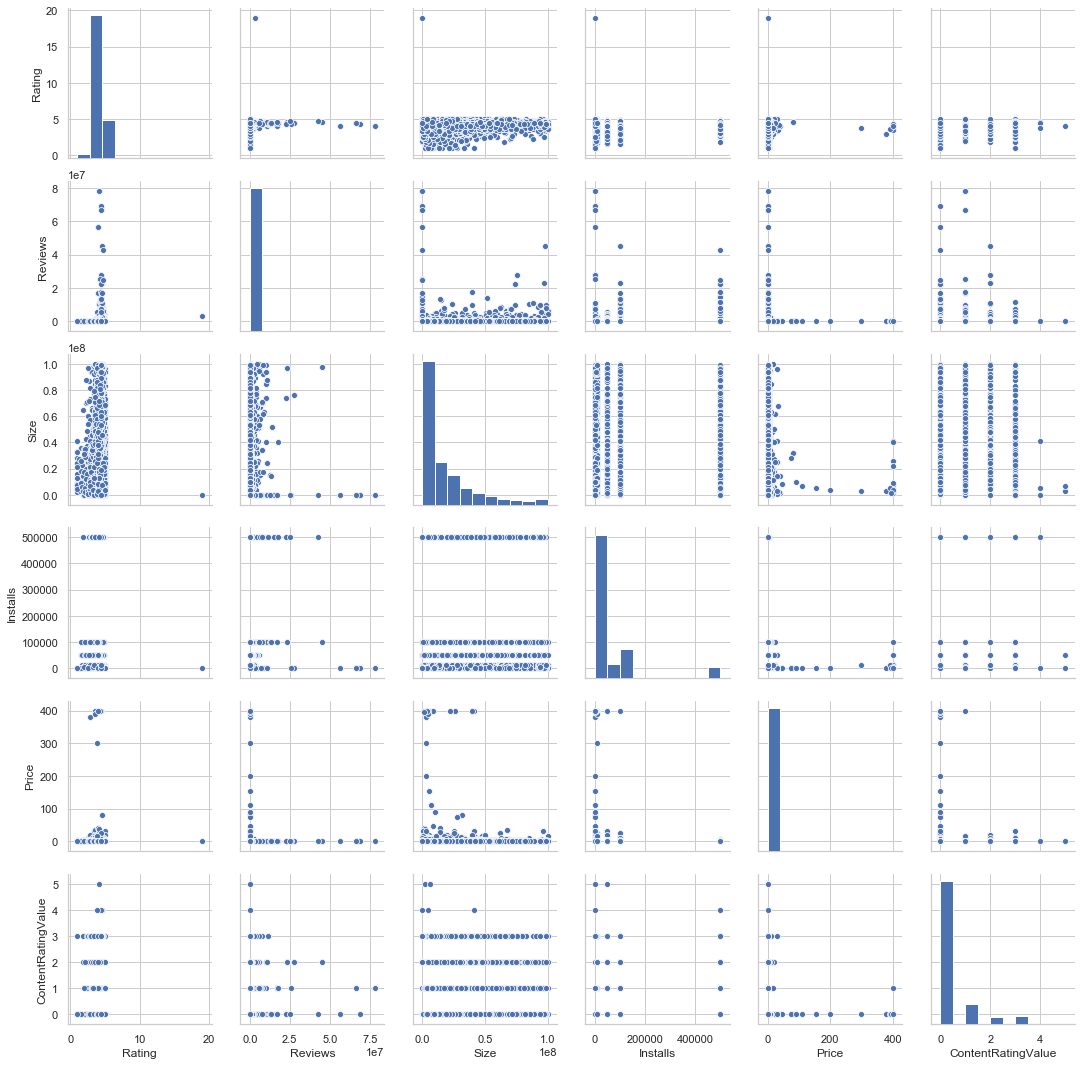

In [93]:
sns.pairplot(df_g)

In [ ]:
#its either free or within a specific price range
#size has little to no corr
#E or teen content rating is most common
#amount of installs based on rounded values

could not graph: App , type: <class 'str'>
could not graph: Category , type: <class 'str'>


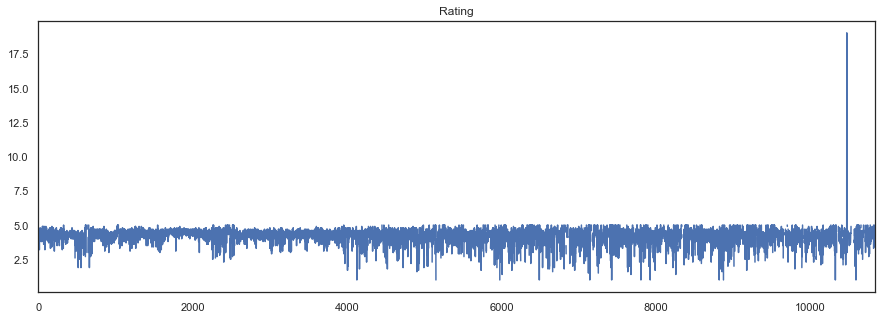

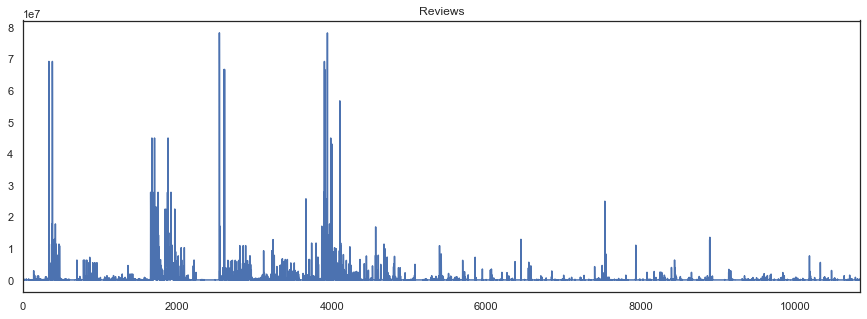

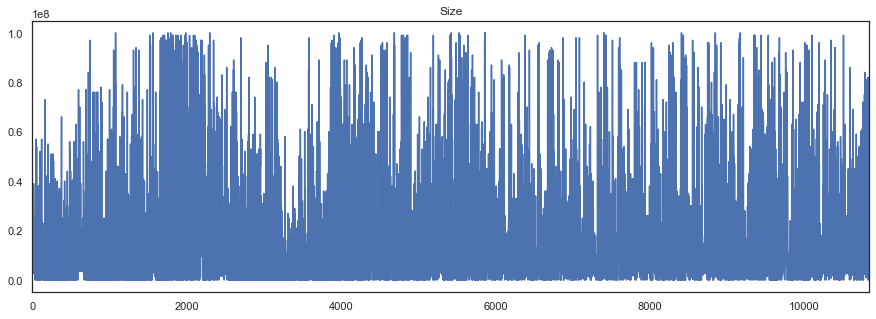

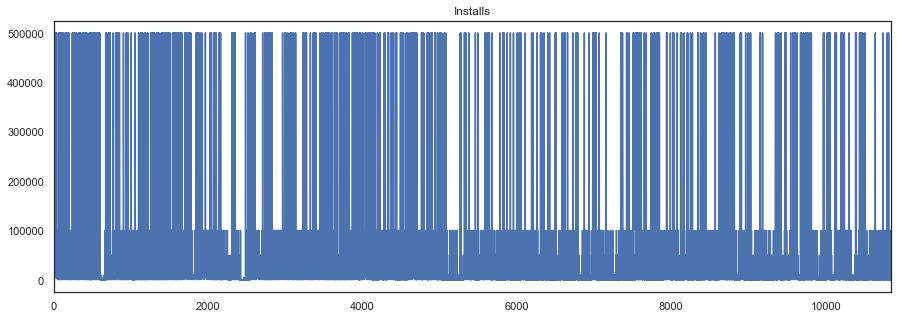

could not graph: Type , type: <class 'str'>


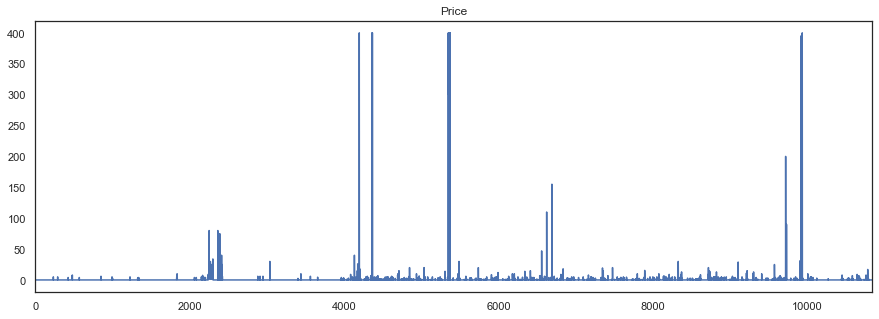

could not graph: Content Rating , type: <class 'str'>
could not graph: Genres , type: <class 'str'>


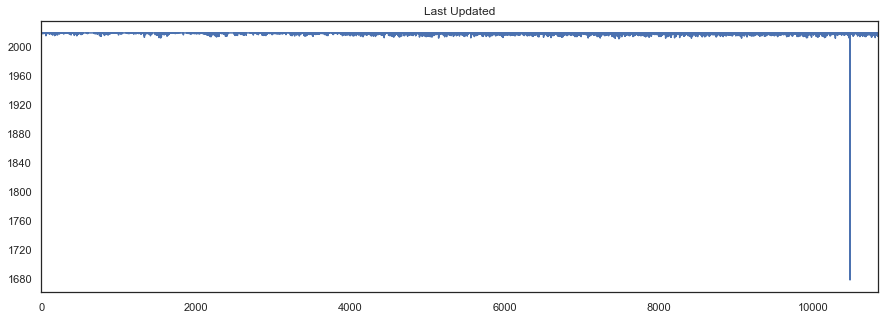

could not graph: Current Ver , type: <class 'str'>
could not graph: Android Ver , type: <class 'str'>


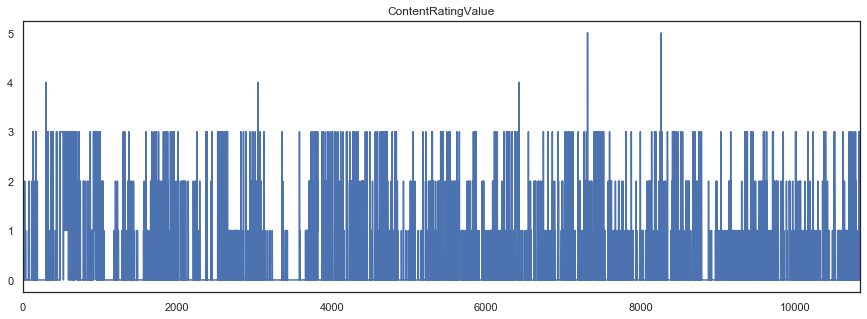

In [246]:
nograph_g = []
for d in df_g.columns:
    try:
        df_g[d].plot(figsize=(15, 5))
        plt.title(d)
        plt.show()
    except:
        print('could not graph: {} , type: {}'.format(d, type(df_g[d][0])))
        
        nograph.append(d)
        continue

# reviews vs installs

In [18]:
plt.plot(df_g['Reviews'], df_g['Installs'])

Error in callback <function flush_figures at 0x115537e60> (for post_execute):


KeyboardInterrupt: 

In [27]:
x = np.array(df_g['Reviews'].iloc[:100])
y = np.array(df_g['Installs'].iloc[:100])

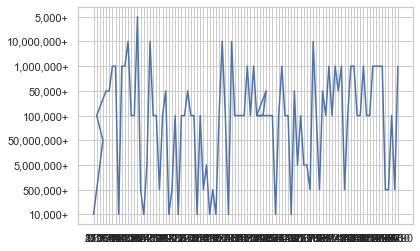

In [30]:
plt.plot(x, y)
plt.show()

# EDA 

## Heatmaps

### Apple

In [153]:
df_a.isna().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [158]:
df_a[['id', 'track_name', 'size_bytes',
                  'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver',
                 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num']].dtypes

id                    int64
track_name           object
size_bytes            int64
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
dtype: object

In [33]:
features_a = ['size_bytes',
                  'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver',
                  'sup_devices.num']

In [34]:
scaler = StandardScaler()
scaler.fit(df_a[features_a])
X_train_a =pd.DataFrame(data=scaler.transform(df_a[features_a]), columns=features_a)

In [207]:
corr.dtypes

id                  float64
size_bytes          float64
price               float64
rating_count_tot    float64
rating_count_ver    float64
user_rating         float64
user_rating_ver     float64
sup_devices.num     float64
dtype: object

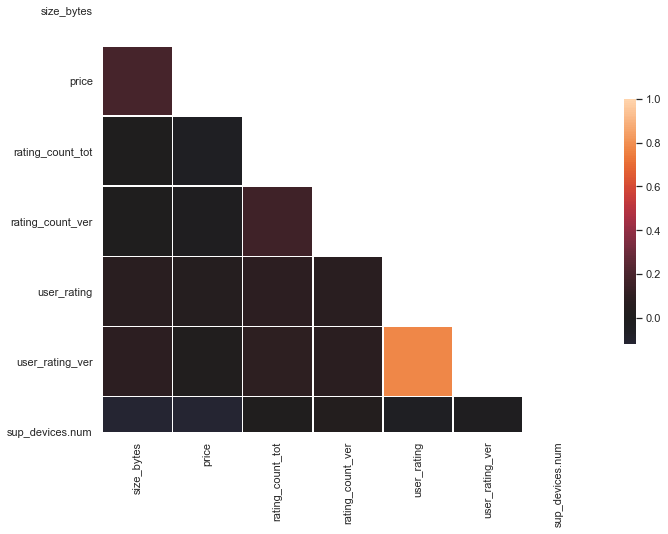

In [35]:

sns.set(style="white")


#Compute the correlation matrix
corr = X_train_a.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [38]:
df_a_all2.dtypes

currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
id                    int64
track_name           object
size_bytes            int64
app_desc             object
dtype: object

In [39]:
features_a_all = ['size_bytes',
                  'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver',
                  'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']

In [42]:
scaler = StandardScaler()
scaler.fit(df_a_all2[features_a_all])
X_train_a_all =pd.DataFrame(data=scaler.transform(df_a_all2[features_a_all]), columns=features_a_all)

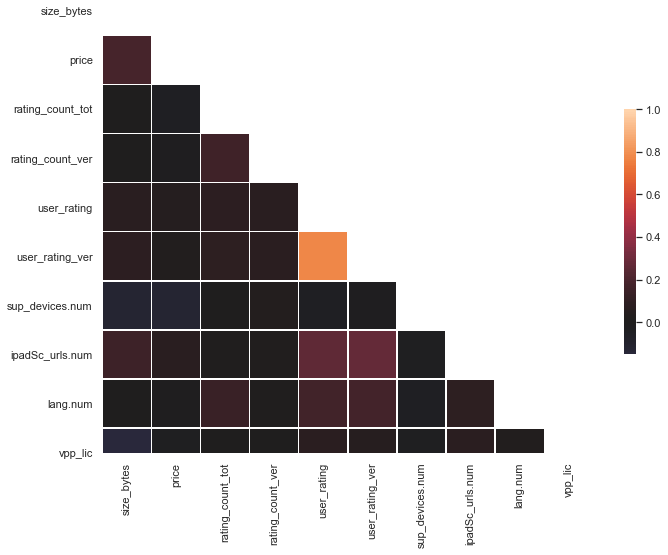

In [43]:

sns.set(style="white")


#Compute the correlation matrix
corr = X_train_a_all.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#corr between number of screenshots taken and user reviews
#supported devices has little affect on rating


### Google

In [162]:
df_g.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [189]:
df_g.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                      object
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [105]:
features_g = ['Rating', 'Reviews', 'Installs', 'Price', 'ContentRatingValue']

In [106]:
scaler1 = StandardScaler()
scaler1.fit(df_g[features_g])
X_train_g =pd.DataFrame(data=scaler1.transform(df_g[features_g]), columns=features_g)

In [107]:
corr

,Rating,Reviews,Installs,Price
Rating,1.000000,0.067645,-0.004954,-0.021176
Reviews,0.067645,1.000000,0.092655,-0.009672
Installs,-0.004954,0.092655,1.000000,-0.018934
Price,-0.021176,-0.009672,-0.018934,1.000000


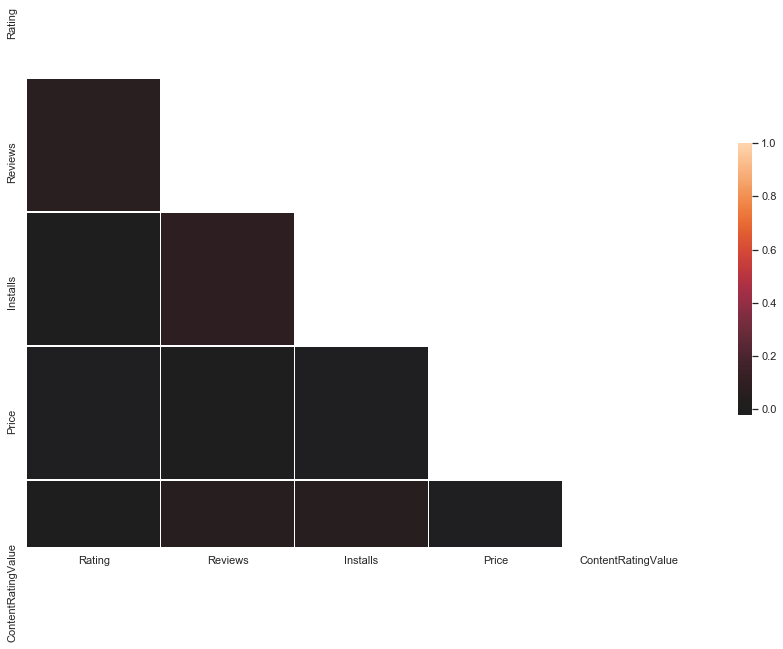

In [108]:

sns.set(style="white")


#Compute the correlation matrix
corr = X_train_g.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Clustering

## plot_agglomerative_algorithm

In [ ]:
def plot_agglomerative_algorithm():
    # generate synthetic two-dimensional data
    X, y = make_blobs(random_state=0, n_samples=12)

    agg = AgglomerativeClustering(n_clusters=X.shape[0], compute_full_tree=True).fit(X)

    fig, axes = plt.subplots(X.shape[0] // 5, 5, subplot_kw={'xticks': (),
                                                             'yticks': ()},
                             figsize=(20, 8))

    eps = X.std() / 2

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    gridpoints = np.c_[xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)]

    for i, ax in enumerate(axes.ravel()):
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        agg.n_clusters = X.shape[0] - i
        agg.fit(X)
        ax.set_title("Step %d" % i)
        ax.scatter(X[:, 0], X[:, 1], s=60, c='grey')
        bins = np.bincount(agg.labels_)
        for cluster in range(agg.n_clusters):
            if bins[cluster] > 1:
                points = X[agg.labels_ == cluster]
                other_points = X[agg.labels_ != cluster]

                kde = KernelDensity(bandwidth=.5).fit(points)
                scores = kde.score_samples(gridpoints)
                score_inside = np.min(kde.score_samples(points))
                score_outside = np.max(kde.score_samples(other_points))
                levels = .8 * score_inside + .2 * score_outside
                ax.contour(xx, yy, scores.reshape(100, 100), levels=[levels],
                           colors='k', linestyles='solid', linewidths=2)

    axes[0, 0].set_title("Initialization")


## plot_agglomerative

In [70]:
scaler_results

array([[-0.47014558, -0.54088422],
       [ 2.93268061, -0.52856399],
       [-0.50486829,  0.79102768],
       [-0.19236385,  2.74479122],
       [ 0.15486331, -0.52856399],
       [-0.19236385, -0.54076224],
       [-0.19236385, -0.54059451],
       [-0.53264647,  0.01803969],
       [-0.53264647, -0.33302601],
       [-0.47014558, -0.54146364]])

In [71]:
scaler_results[:, 0]

array([-0.47014558,  2.93268061, -0.50486829, -0.19236385,  0.15486331,
       -0.19236385, -0.19236385, -0.53264647, -0.53264647, -0.47014558])

In [110]:

def plot_agglomerative(agg, X, y):
    #X, y = make_blobs(random_state=0, n_samples=12)
    #agg = AgglomerativeClustering(n_clusters=10)

    eps = X.std() / 2.

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    gridpoints = np.c_[xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)]

    ax = plt.gca()
    for i, x in enumerate(X):
        ax.text(x[0] + .1, x[1], "%d" % i, horizontalalignment='left', verticalalignment='center')

    ax.scatter(X[:, 0], X[:, 1], s=60, c='grey')
    ax.set_xticks(())
    ax.set_yticks(())

    for i in range(11):
        agg.n_clusters = X.shape[0] - i
        agg.fit(X)

        bins = np.bincount(agg.labels_)
        for cluster in range(agg.n_clusters):
            if bins[cluster] > 1:
                points = X[agg.labels_ == cluster]
                other_points = X[agg.labels_ != cluster]

                kde = KernelDensity(bandwidth=.5).fit(points)
                scores = kde.score_samples(gridpoints)
                score_inside = np.min(kde.score_samples(points))
                score_outside = np.max(kde.score_samples(other_points))
                levels = .8 * score_inside + .2 * score_outside
                ax.contour(xx, yy, scores.reshape(100, 100), levels=[levels],
                           colors='k', linestyles='solid', linewidths=1)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)



In [244]:
df_a.dtypes

id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
target              float64
dtype: object

In [249]:
df_pa.drop(columns=['track_name', 'prime_genre'])

,size_bytes,rating_count_tot,user_rating,price
0,100788224,21292,4.0,3.99
1,158578688,161065,4.0,0.00
2,100524032,188583,3.5,0.00
3,128512000,262241,4.0,0.00
4,92774400,985920,4.5,0.00
...,...,...,...,...
7192,126644224,142,4.5,0.00
7193,120760320,30,4.5,0.00
7194,111322112,15,4.5,1.99
7195,97235968,85,4.5,0.00


In [243]:
df_a.head()
one = df_a[['rating_count_tot', 'user_rating', 'size_bytes', '']]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,target
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,0.64
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,0.64
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,0.49
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,0.64
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,0.81


In [424]:
agg = AgglomerativeClustering(n_clusters=25)
agg2 = AgglomerativeClustering(n_clusters=10)

In [246]:
help(agg)

Help on AgglomerativeClustering in module sklearn.cluster._agglomerative object:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)
 |  
 |  Agglomerative Clustering
 |  
 |  Recursively merges the pair of clusters that minimally increases
 |  a given linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed".
 |      If linkage is "ward", only "euclidean" is accepted.
 |      If "precomputed", a dista

In [419]:
preds = agg.fit_predict(X_train)

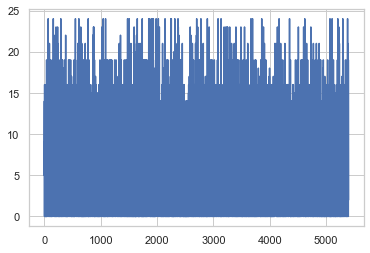

In [421]:
plt.plot(preds)

In [461]:
b, c = make_blobs(random_state=0, n_samples=12)

In [464]:
type(a3)

list

In [55]:
scaler1 = StandardScaler()

In [56]:
scaler_results = scaler1.fit_transform(df_g[['Installs', 'Reviews']].iloc[:10])

In [57]:
scaler_results

array([[-0.47014558, -0.54088422],
       [ 2.93268061, -0.52856399],
       [-0.50486829,  0.79102768],
       [-0.19236385,  2.74479122],
       [ 0.15486331, -0.52856399],
       [-0.19236385, -0.54076224],
       [-0.19236385, -0.54059451],
       [-0.53264647,  0.01803969],
       [-0.53264647, -0.33302601],
       [-0.47014558, -0.54146364]])

In [58]:
#two dimensional array
a1 = np.array(df_g.Installs.head(12))
a2 = np.array(df_g.Reviews.head(12))
a3 = np.array([a1, a2])
a4 = np.array(df_g.target.iloc[:12])

In [59]:
a4.shape

(12,)

In [495]:
scaler_results.shape

(10, 2)

# clusters plotting

In [72]:
a4

array([0.67266904, 0.60864343, 0.88395355, 0.8103241 , 0.73989593,
       0.77470985, 0.57783111, 0.67266904, 0.77470985, 0.88395355,
       0.77470985, 0.77470985])

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

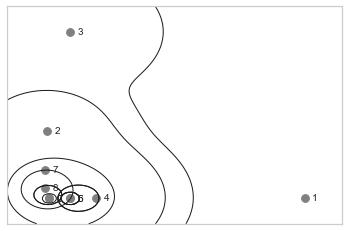

In [60]:
agg = AgglomerativeClustering(n_clusters=20)
plot_agglomerative(agg, scaler_results, a4)

In [61]:
plot_agglomerative(agg2)

NameError: name 'agg2' is not defined

# X, y

In [30]:
X = df_pa.drop(columns=['track_name', 'prime_genre'])
y = df_pa['prime_genre']
X2 = df_a.drop(columns=['prime_genre'])
X2 = df_a[['size_bytes', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver',
         'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'target']]
y2 = df_a['prime_genre']

In [31]:
model = AgglomerativeClustering(n_clusters=25, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

In [32]:
labels[0]

5

In [33]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

TypeError: '(array([False, False, False, ..., False, False, False]), 0)' is an invalid key

In [34]:
df_g.Category.value_counts(), len(df_g.Category.unique())  #33

(FAMILY                 1972
 GAME                   1144
 TOOLS                   843
 MEDICAL                 463
 BUSINESS                460
 PRODUCTIVITY            424
 PERSONALIZATION         392
 COMMUNICATION           387
 SPORTS                  384
 LIFESTYLE               382
 FINANCE                 366
 HEALTH_AND_FITNESS      341
 PHOTOGRAPHY             335
 SOCIAL                  295
 NEWS_AND_MAGAZINES      283
 SHOPPING                260
 TRAVEL_AND_LOCAL        258
 DATING                  234
 BOOKS_AND_REFERENCE     231
 VIDEO_PLAYERS           175
 EDUCATION               156
 ENTERTAINMENT           149
 MAPS_AND_NAVIGATION     137
 FOOD_AND_DRINK          127
 HOUSE_AND_HOME           88
 AUTO_AND_VEHICLES        85
 LIBRARIES_AND_DEMO       85
 WEATHER                  82
 ART_AND_DESIGN           65
 EVENTS                   64
 PARENTING                60
 COMICS                   60
 BEAUTY                   53
 Name: Category, dtype: int64, 33)

In [37]:
df_g.Genres.value_counts()

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
                                      ... 
Books & Reference;Creativity             1
Lifestyle;Education                      1
Health & Fitness;Action & Adventure      1
Trivia;Education                         1
Lifestyle;Pretend Play                   1
Name: Genres, Length: 119, dtype: int64

In [38]:
len(df_a.prime_genre.value_counts())

23

In [39]:
len(df_g.Category.value_counts())

33

In [312]:
df_g.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'ContentRatingValue', 'target'],
      dtype='object')

In [40]:
primegenrelist = list(df_a.prime_genre.value_counts().index)
categorylist = list(df_g.Category.value_counts().index)

In [41]:
matched = []
unmatched = []
for x in categorylist:
    if (x in pgl):
        matched.append(x)
    else:
        unmatched.append(x)
onlyapple = []
for x in pgl:
    if (x not in categorylist):
        onlyapple.append(x)

NameError: name 'pgl' is not defined

In [42]:
matched, onlyapple, unmatched

NameError: name 'onlyapple' is not defined

In [213]:
unmatched #google categories not in apple prime genres

['FAMILY',
 'GAME',
 'TOOLS',
 'PERSONALIZATION',
 'COMMUNICATION',
 'HEALTH_AND_FITNESS',
 'PHOTOGRAPHY',
 'SOCIAL',
 'NEWS_AND_MAGAZINES',
 'TRAVEL_AND_LOCAL',
 'DATING',
 'BOOKS_AND_REFERENCE',
 'VIDEO_PLAYERS',
 'MAPS_AND_NAVIGATION',
 'FOOD_AND_DRINK',
 'HOUSE_AND_HOME',
 'AUTO_AND_VEHICLES',
 'LIBRARIES_AND_DEMO',
 'ART_AND_DESIGN',
 'EVENTS',
 'PARENTING',
 'COMICS',
 'BEAUTY']

In [210]:
len(pgl), len(categorylist)

(23, 33)

In [204]:
sorted(pgl), sorted(categorylist)

(['BOOK',
  'BUSINESS',
  'CATALOGS',
  'EDUCATION',
  'ENTERTAINMENT',
  'FINANCE',
  'FOOD & DRINK',
  'GAMES',
  'HEALTH & FITNESS',
  'LIFESTYLE',
  'MEDICAL',
  'MUSIC',
  'NAVIGATION',
  'NEWS',
  'PHOTO & VIDEO',
  'PRODUCTIVITY',
  'REFERENCE',
  'SHOPPING',
  'SOCIAL NETWORKING',
  'SPORTS',
  'TRAVEL',
  'UTILITIES',
  'WEATHER'],
 ['ART_AND_DESIGN',
  'AUTO_AND_VEHICLES',
  'BEAUTY',
  'BOOKS_AND_REFERENCE',
  'BUSINESS',
  'COMICS',
  'COMMUNICATION',
  'DATING',
  'EDUCATION',
  'ENTERTAINMENT',
  'EVENTS',
  'FAMILY',
  'FINANCE',
  'FOOD_AND_DRINK',
  'GAME',
  'HEALTH_AND_FITNESS',
  'HOUSE_AND_HOME',
  'LIBRARIES_AND_DEMO',
  'LIFESTYLE',
  'MAPS_AND_NAVIGATION',
  'MEDICAL',
  'NEWS_AND_MAGAZINES',
  'PARENTING',
  'PERSONALIZATION',
  'PHOTOGRAPHY',
  'PRODUCTIVITY',
  'SHOPPING',
  'SOCIAL',
  'SPORTS',
  'TOOLS',
  'TRAVEL_AND_LOCAL',
  'VIDEO_PLAYERS',
  'WEATHER'])

In [224]:
#no missing values
df_a_all.user_rating.max()

5.0

# Target

- The scalar is the scaled version of the rating system
- The actual target should be something quantified from 

In [16]:
df_a_all['target'] = (df_a_all['user_rating'] ** 2 )/ ( df_a_all['user_rating'].max() ** 2)

In [17]:
df_g.Rating.min(), df_g.Rating.max()

(0.001, 5.0)

In [19]:
df_g['target'] = ((df_g.Rating ** 2) / ((df_g.Rating.max() - df_g.Rating.min()) ** 2))

In [28]:
df_a.user_rating

0       4.0
1       4.0
2       3.5
3       4.0
4       4.5
       ... 
7192    4.5
7193    4.5
7194    4.5
7195    4.5
7196    5.0
Name: user_rating, Length: 7197, dtype: float64

In [29]:
df_a['target'] = ((df_a.user_rating ** 2) / ((df_a.user_rating.max() - df_a.user_rating.min()) ** 2))

In [20]:
df_g.target.describe()

count    1.084000e+04
mean     6.166833e-01
std      2.838302e-01
min      4.001600e-08
25%      5.478191e-01
50%      7.058823e-01
75%      8.103241e-01
max      1.000400e+00
Name: target, dtype: float64

In [21]:
df_a_all.target.describe()

count    7197.000000
mean        0.589730
std         0.297266
min         0.000000
25%         0.490000
50%         0.640000
75%         0.810000
max         1.000000
Name: target, dtype: float64

In [22]:
df_g.target.head()

0    0.672669
1    0.608643
2    0.883954
3    0.810324
4    0.739896
Name: target, dtype: float64

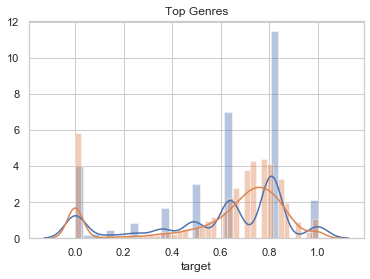

In [23]:
sns.distplot(df_a_all.target);
sns.distplot(df_g.target);
#plt.xlabel('Ratings distribution')
plt.title('Top Genres')
plt.show()

# Test

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=1)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)

In [47]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [49]:
# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))



Accuracy:0.4866666666666667


In [50]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[  4   0   0   2   5   1   1  10   0   0   0   0   0   0   1   1   0   0
    0   0   0   1   0]
 [  0   2   1   2   2   0   0   7   1   1   0   1   0   1   1   1   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   1   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  1   3   0  31  10   0   0  54   2   0   0   2   0   1   1   1   0   0
    0   1   0   1   0]
 [  2   3   2   9  22   3   0  74   1   4   0   1   0   0   4   4   0   0
    0   4   0   2   1]
 [  1   0   0   3   3   2   0  13   0   2   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  1   0   0   3   0   0   0   9   0   1   0   0   0   0   2   0   0   0
    0   0   0   0   0]
 [ 18   4   2  51  46   7   2 803   3   6   0   1   0   0  17   5   0   2
    5   1   0  10   0]
 [  0   0   0   8   5   0   0  27   1   1   0   1   0   0   1   2   0   0
    0   0   0   0   0]
 [  2   2   0   2   3   1   0  10   0   0   0   0   0   0   1   0   0   0
    0   0   0

NameError: name 'itertools' is not defined

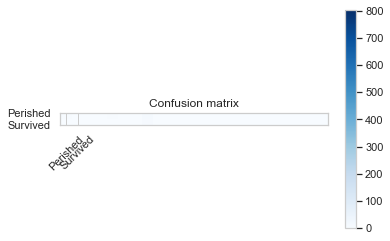

In [270]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix')#,
                          #cmap=plt.cm.Blues)

In [303]:
asdfd = pd.DataFrame(y_test)

In [307]:
len(asdfd.prime_genre.value_counts())

23

In [268]:
#create a container to track the scores
k_scores=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(1,120 ))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    k_scores.append(metrics.accuracy_score(y_test, knn.predict(X_test)))
    #fit the model and get the score on a evaluation metric
print(k_scores)
    # Print out the scores to see which one is best. 

[0.4011111111111111, 0.4111111111111111, 0.45055555555555554, 0.465, 0.4866666666666667, 0.495, 0.505, 0.52, 0.5238888888888888, 0.525, 0.5272222222222223, 0.5283333333333333, 0.5288888888888889, 0.535, 0.5344444444444445, 0.5394444444444444, 0.5416666666666666, 0.54, 0.5422222222222223, 0.5444444444444444, 0.5422222222222223, 0.5427777777777778, 0.5405555555555556, 0.5394444444444444, 0.5422222222222223, 0.5422222222222223, 0.5422222222222223, 0.5444444444444444, 0.5433333333333333, 0.5461111111111111, 0.5466666666666666, 0.5438888888888889, 0.5466666666666666, 0.5455555555555556, 0.5438888888888889, 0.5455555555555556, 0.5472222222222223, 0.5461111111111111, 0.5466666666666666, 0.5455555555555556, 0.5455555555555556, 0.5461111111111111, 0.5466666666666666, 0.5472222222222223, 0.55, 0.5488888888888889, 0.5505555555555556, 0.5494444444444444, 0.5488888888888889, 0.5494444444444444, 0.55, 0.5494444444444444, 0.5505555555555556, 0.5511111111111111, 0.5516666666666666, 0.5516666666666666,

In [51]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.show()

NameError: name 'k_range' is not defined

<Figure size 864x432 with 0 Axes>

# Decision Tree

In [274]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import make_scorer, accuracy_score #Import scikit-learn metrics module for accuracy calculation



In [275]:
feature_cols = X.columns

In [294]:
X_train2.dtypes
X_train2[['size_bytes', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver',
         'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'target']]

id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
target              float64
dtype: object

In [297]:
X_train2.dtypes

id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
target              float64
dtype: object

In [299]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
clf2 = clf.fit(X_train2, y_train2)
#predict the training set
y_pred_train = clf.predict(X_train)
y_pred_train2 = clf2.predict(X_train2)
#Predict the response for test dataset
y_pred_test = clf.predict(X_test)
y_pred_test = clf2.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
#print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
#print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))


ValueError: Number of features of the model must match the input. Model n_features is 11 and input n_features is 4 

In [280]:
y_pred_test

array(['Games', 'Education', 'Games', ..., 'Games', 'Games',
       'Entertainment'], dtype=object)

In [287]:
count = 0
for i, x in enumerate(np.array(y_test)):
    if (y_pred_test[i] == x):
         count += 1


In [289]:
count / len(y_pred_test)

0.3933333333333333

# Genres

In [319]:
matched

['MEDICAL',
 'BUSINESS',
 'PRODUCTIVITY',
 'SPORTS',
 'LIFESTYLE',
 'FINANCE',
 'SHOPPING',
 'EDUCATION',
 'ENTERTAINMENT',
 'WEATHER']

In [337]:
df_a.columns, df_g.columns

(Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
        'rating_count_tot', 'rating_count_ver', 'user_rating',
        'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
        'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'target',
        'Installs'],
       dtype='object'),
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
        'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
        'Android Ver', 'ContentRatingValue', 'target'],
       dtype='object'))

In [318]:
df_a['Installs'] = df_a.rating_count_tot

In [404]:
google_stats = {}
apple_stats = {}
google_genre_dfs = {}
apple_genre_dfs = {}
for match in matched:
    df = df_g[df_g['Category'] == match]
    google_genre_dfs[match] = df
    dfa = df_a[df_a['prime_genre'] == match.title()]
    apple_genre_dfs[match] = dfa
    google_stats[match] = (df['Installs'].mean(), df['Rating'].mean())
    apple_stats[match] = (dfa['rating_count_tot'].mean(), dfa['user_rating'].mean())

In [341]:
df= df_g[df_g['Category'] == 'SPORTS']

In [324]:
dfasd = df_a[df_a['prime_genre'] == 'SPORTS'.capitalize()]

In [336]:
dfasd['Installs'].mean(), dfasd['user_rating'].mean(), dfasd['']

(14026.929824561403, 2.982456140350877)

In [344]:
google_stats

{'MEDICAL': (33035.50107991361, 3.166982721382286),
 'BUSINESS': (25882.315217391304, 2.7151239130434712),
 'PRODUCTIVITY': (52498.51179245283, 3.4864929245282985),
 'SPORTS': (38834.630208333336, 3.5087630208333302),
 'LIFESTYLE': (44933.34816753927, 3.366146596858633),
 'FINANCE': (39649.54644808743, 3.6465655737704914),
 'SHOPPING': (61860.71153846154, 3.899315384615385),
 'EDUCATION': (66115.38461538461, 4.360903846153847),
 'ENTERTAINMENT': (33738.25503355705, 4.126174496644294),
 'WEATHER': (67335.60975609756, 3.8817926829268274)}

Text(0.5, 1.0, 'Installs vs Rating')

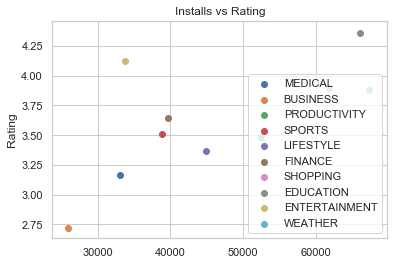

In [375]:

for stat in google_stats:
    plt.scatter(google_stats[stat][0], google_stats[stat][1])
plt.ylabel('Rating')
plt.legend(google_stats.keys())
plt.title('Installs vs Rating')

Text(0.5, 1.0, 'Apple Installs vs Rating')

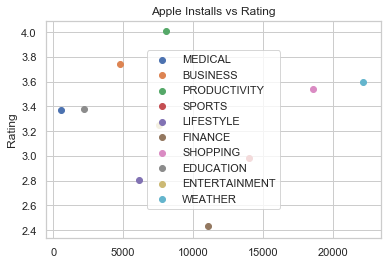

In [379]:

for stat in apple_stats:
    plt.scatter(apple_stats[stat][0], apple_stats[stat][1])
plt.ylabel('Rating')
plt.legend(apple_stats.keys())
plt.title('Apple Installs vs Rating')

## top genres

In [386]:
df_g_d.shape #26868

(64295, 5)

In [387]:
df_gd_ = df_g_d.dropna(inplace=True)

In [393]:
gdescripts = df_g_d.App.unique()

In [398]:
df_g_d.Translated_Review[0]

'I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"hi'

In [399]:
df_g.App

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10839                        The SCP Foundation DB fr nn5n
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 10840, dtype: object

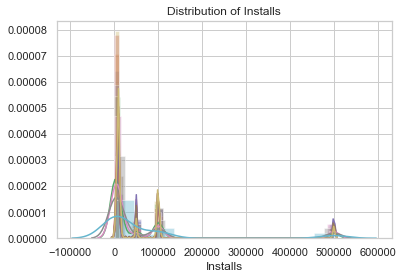

In [409]:
for match in matched:
    sns.distplot(google_genre_dfs[match].Installs)
plt.title('Distribution of Installs');

In [411]:
topApps_df = df_g[df_g.Installs > 300000]

In [417]:
topApps_df.Genres.value_counts()

Tools                          35
Health & Fitness               32
Entertainment                  30
Action                         28
Casual                         27
                               ..
Educational                     1
Events                          1
Music & Audio;Music & Video     1
Strategy;Education              1
Board;Brain Games               1
Name: Genres, Length: 67, dtype: int64

In [400]:
for name in df_g.App:
    print(name)
    break

Photo Editor & Candy Camera & Grid & ScrapBook


In [506]:
df_gdesc = df_g_d.groupby('App').mean()

In [508]:
df_gdesc.head()

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
10 Best Foods for You,0.470733,0.495455
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
11st,0.185943,0.455340
1800 Contacts - Lens Store,0.318145,0.591098
1LINE – One Line with One Touch,0.196290,0.557315


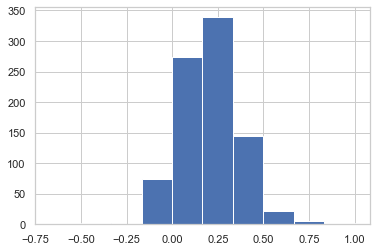

In [512]:
df_gdesc['Sentiment_Polarity'].hist()

In [83]:
df_g.shape

(10840, 15)

In [73]:
df_g.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'ContentRatingValue', 'target'],
      dtype='object')

In [98]:
df_g.Size.min(), df_g.Size.std()

(8500.0, 20747494.59449188)

In [97]:
df_g[df_g.Size >= 21516161].shape

(3249, 15)

In [99]:
scaled_google = StandardScaler()
sg_matrix = scaled_google.fit_transform(df_g[['Rating', 'Reviews', 'Installs', 'Size']])

In [102]:
sg_matrix[:, 0].min(), sg_matrix[:, 0].max(), sg_matrix[:, 0].mean(), sg_matrix[:, 0].std()

(-2.391350686692602,
 0.9101319078890624,
 2.3072974445346425e-16,
 1.0000000000000002)

In [103]:
sg_matrix.shape

(10840, 4)

In [104]:
for i in range(4):
    print(sg_matrix[:, i].min(), sg_matrix[:, i].max(), sg_matrix[:, i].mean(), sg_matrix[:, i].std())

-2.391350686692602 0.9101319078890624 2.3072974445346425e-16 1.0000000000000002
-0.15171096421560556 26.545113644199734 -5.243857828487824e-18 0.9999999999999999
-0.42652342918094477 3.905039015431778 -3.1463146970926945e-17 0.9999999999999999
-1.0366868010918417 3.7829848955445966 -2.621928914243912e-18 0.9999999999999998


In [108]:
from sklearn.preprocessing import MinMaxScaler

minmax_google = MinMaxScaler(feature_range=(0.0001, 1))
minmax_google2 = MinMaxScaler(feature_range=(0.0001, 1))
sg_minmax = minmax_google.fit_transform(df_g[['Rating', 'Reviews', 'Installs', 'Size']])
sg_minmax2 = minmax_google2.fit_transform(df_g[['Rating', 'Reviews', 'Installs', 'Size']])

In [107]:
for i in range(4):
    print(sg_minmax[:, i].min(), sg_minmax[:, i].max(), sg_minmax[:, i].mean(), sg_minmax[:, i].std())

0.0 1.0 0.7243263043752661 0.30289422141470096
0.0 1.0 0.005682734424070173 0.03745763830222644
0.0 1.0 0.09846872453874538 0.23086357700873644
0.0 1.0 0.21509489989024078 0.20748301190263266


In [109]:
for i in range(4):
    print(sg_minmax2[:, i].min(), sg_minmax2[:, i].max(), sg_minmax2[:, i].mean(), sg_minmax2[:, i].std())

0.0001 1.0 0.7243538717448287 0.3028639319925595
0.0001 1.0 0.005782166150627766 0.03745389253839622
0.0001 0.9999999999999999 0.09855887766629151 0.23084049065103554
0.0001 1.0 0.2151733904002518 0.2074622636014424


In [115]:
len(df_g.Genres.unique())

119

In [130]:
df_g.Genres.value_counts()[:30]

Tools                      842
Entertainment              623
Education                  549
Medical                    463
Business                   460
Productivity               424
Sports                     398
Personalization            392
Communication              387
Lifestyle                  381
Finance                    366
Action                     365
Health & Fitness           341
Photography                335
Social                     295
News & Magazines           283
Shopping                   260
Travel & Local             257
Dating                     234
Books & Reference          231
Arcade                     220
Simulation                 200
Casual                     193
Video Players & Editors    173
Puzzle                     140
Maps & Navigation          137
Food & Drink               127
Role Playing               109
Strategy                   107
Racing                      98
Name: Genres, dtype: int64

In [131]:
agc = AgglomerativeClustering(n_clusters = 30)

In [133]:
agc_minmax = agc.fit(sg_minmax)

In [135]:
agc_minmax.labels_.size

10840

In [138]:
df_g['Label'] = agc_minmax.labels_

In [137]:
df_g.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'ContentRatingValue', 'target'],
      dtype='object')

In [153]:
df_g.Label.value_counts()

3     1393
18    1036
0      799
13     767
10     727
1      714
25     620
16     611
2      520
20     391
28     333
8      311
22     303
29     300
15     234
11     217
7      199
6      188
19     186
4      184
21     181
14     148
26     110
24      87
5       73
17      66
9       61
12      55
27      14
23      12
Name: Label, dtype: int64

In [140]:
df_g['LabelGenre'] = -1

In [ ]:
def labelToGenre(x):
    

In [147]:
df_gCur = df_g[df_g.Label == 0]
df_gCur2 = df_g[df_g.Label == 1]

In [145]:
df_gCur.Genres.value_counts()

Productivity                 56
Photography                  51
Tools                        49
Communication                47
Action                       44
                             ..
Sports;Action & Adventure     1
Education;Pretend Play        1
Parenting;Music & Video       1
Puzzle;Education              1
Casual;Brain Games            1
Name: Genres, Length: 69, dtype: int64

In [150]:
label = df_gCur2.Genres.value_counts().index[0]

'Tools'

In [160]:
genrelist = []
for i in range(30):
    df_gCur = df_g[df_g.Label == i]
    label = df_gCur.Genres.value_counts().index[0]
    genrelist.append(label)

In [161]:
genrelist

['Productivity',
 'Tools',
 'Action',
 'Tools',
 'Tools',
 'Tools',
 'Tools',
 'Action',
 'Action',
 'Business',
 'Tools',
 'Health & Fitness',
 'Tools',
 'Communication',
 'Travel & Local',
 'Action',
 'Business',
 'Action',
 'Health & Fitness',
 'Communication',
 'Tools',
 'Medical',
 'Action',
 'Social',
 'Action',
 'Business',
 'Action',
 'Strategy',
 'Entertainment',
 'Entertainment']

In [29]:
#returns list of top genres per number of clusters sent
def testCluster(X, n = 30, name = 'Label', df_g=df_g, genre='Genres'):
    agc = AgglomerativeClustering(n_clusters = n)
    agc_minmax = agc.fit(X)
    df_g[name] = agc_minmax.labels_
    
    glist = []
    for i in range(n):
        df_gCur = df_g[df_g[name] == i]
        label = df_gCur[genre].value_counts().index[0]
        glist.append(label)
    return glist
    
    

In [180]:
li = testCluster(df_g[['Rating', 'Reviews', 'Installs', 'Size']], n = 30, name = 'Label2')

In [186]:
li5 = testCluster(df_g[['Rating', 'Reviews', 'Installs', 'Size']], n = 5, name = 'Top5')

In [189]:
li10 = testCluster(df_g[['Rating', 'Reviews', 'Installs', 'Size']], n = 10, name = 'Top10')

In [203]:
li30 = testCluster(df_g[['Rating', 'Reviews', 'Installs', 'Size', 'GenreNum', 'ContentRatingValue']], n = 30, name = 'Top30')

In [205]:
li10_2 = testCluster(df_g[['Rating', 'Reviews', 'Installs', 'Size', 'GenreNum']], n = 10, name = '2Top10')

In [202]:
df_g.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'ContentRatingValue', 'target', 'Label', 'LabelGenre',
       'Label2', 'Top5', 'Top10', 'GenreNum'],
      dtype='object')

In [206]:
li10_2

['Tools',
 'Action',
 'Action',
 'Tools',
 'Action',
 'Tools',
 'Social',
 'Medical',
 'Action',
 'Action']

In [204]:
li30

['Action',
 'Strategy',
 'Social',
 'Tools',
 'Action',
 'Action',
 'Communication',
 'Action',
 'Entertainment',
 'Action',
 'Sports',
 'Medical',
 'Health & Fitness',
 'Tools',
 'Sports',
 'Tools',
 'Action',
 'Tools',
 'Action',
 'Casual',
 'Action',
 'Entertainment',
 'Communication',
 'Productivity',
 'Action',
 'Action',
 'Adventure;Action & Adventure',
 'Tools',
 'Simulation',
 'Tools']

In [190]:
li10

['Tools',
 'Action',
 'Action',
 'Tools',
 'Action',
 'Tools',
 'Social',
 'Medical',
 'Action',
 'Action']

In [184]:
genrelist, li

(['Productivity',
  'Tools',
  'Action',
  'Tools',
  'Tools',
  'Tools',
  'Tools',
  'Action',
  'Action',
  'Business',
  'Tools',
  'Health & Fitness',
  'Tools',
  'Communication',
  'Travel & Local',
  'Action',
  'Business',
  'Action',
  'Health & Fitness',
  'Communication',
  'Tools',
  'Medical',
  'Action',
  'Social',
  'Action',
  'Business',
  'Action',
  'Strategy',
  'Entertainment',
  'Entertainment'],
 ['Action',
  'Strategy',
  'Social',
  'Tools',
  'Action',
  'Action',
  'Communication',
  'Action',
  'Entertainment',
  'Action',
  'Sports',
  'Medical',
  'Health & Fitness',
  'Tools',
  'Sports',
  'Tools',
  'Action',
  'Tools',
  'Action',
  'Casual',
  'Action',
  'Entertainment',
  'Communication',
  'Productivity',
  'Action',
  'Action',
  'Adventure;Action & Adventure',
  'Tools',
  'Simulation',
  'Tools'])

In [182]:
df_g.Label.value_counts()

3     1393
18    1036
0      799
13     767
10     727
1      714
25     620
16     611
2      520
20     391
28     333
8      311
22     303
29     300
15     234
11     217
7      199
6      188
19     186
4      184
21     181
14     148
26     110
24      87
5       73
17      66
9       61
12      55
27      14
23      12
Name: Label, dtype: int64

In [183]:
df_g.Label2.value_counts()

23    1692
15    1094
17    1007
13     759
29     709
3      680
8      592
14     532
27     489
21     425
11     381
9      275
4      242
20     219
28     208
0      197
12     197
22     189
16     188
7      150
24     136
5      123
25     114
18      94
6       67
26      37
2       13
19      13
10      10
1        8
Name: Label2, dtype: int64

In [196]:
genre_dict = {}
for x, y in enumerate(df_g.Genres.value_counts().index):
    genre_dict[y] = x

In [197]:
genre_dict

{'Tools': 0,
 'Entertainment': 1,
 'Education': 2,
 'Medical': 3,
 'Business': 4,
 'Productivity': 5,
 'Sports': 6,
 'Personalization': 7,
 'Communication': 8,
 'Lifestyle': 9,
 'Finance': 10,
 'Action': 11,
 'Health & Fitness': 12,
 'Photography': 13,
 'Social': 14,
 'News & Magazines': 15,
 'Shopping': 16,
 'Travel & Local': 17,
 'Dating': 18,
 'Books & Reference': 19,
 'Arcade': 20,
 'Simulation': 21,
 'Casual': 22,
 'Video Players & Editors': 23,
 'Puzzle': 24,
 'Maps & Navigation': 25,
 'Food & Drink': 26,
 'Role Playing': 27,
 'Strategy': 28,
 'Racing': 29,
 'House & Home': 30,
 'Libraries & Demo': 31,
 'Auto & Vehicles': 32,
 'Weather': 33,
 'Adventure': 34,
 'Events': 35,
 'Comics': 36,
 'Art & Design': 37,
 'Beauty': 38,
 'Education;Education': 39,
 'Card': 40,
 'Parenting': 41,
 'Board': 42,
 'Educational;Education': 43,
 'Casino': 44,
 'Trivia': 45,
 'Educational': 46,
 'Casual;Pretend Play': 47,
 'Word': 48,
 'Entertainment;Music & Video': 49,
 'Education;Pretend Play': 50,

In [199]:
df_g['GenreNum'] = df_g.Genres.replace(genre_dict)

In [200]:
df_g.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Current Ver,Android Ver,ContentRatingValue,target,Label,LabelGenre,Label2,Top5,Top10,GenreNum
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,...,1.0.0,4.0.3 and up,0,0.672669,13,-1,21,2,3,37
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,0,0.608643,11,-1,3,0,0,91
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000,Free,0.0,Everyone,Art & Design,...,1.2.4,4.0.3 and up,0,0.883954,3,-1,27,0,0,37
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000,Free,0.0,Teen,Art & Design,...,Varies with device,4.2 and up,1,0.810324,0,-1,14,2,3,37
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,...,1.1,4.4 and up,0,0.739896,1,-1,17,0,5,63


In [220]:
topgenres = df_g.Genres.value_counts()[:10].index

In [214]:
df_g_top10 = df_g[(df_g['Genres'] == 'Tools') or (df_g['Genres'] == 'Entertainment')]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [226]:
topgenres

Index(['Tools', 'Entertainment', 'Education', 'Medical', 'Business',
       'Productivity', 'Sports', 'Personalization', 'Communication',
       'Lifestyle'],
      dtype='object')

In [234]:
df_g[df_g.Genres == 'Lifestyle'].shape, df_g[df_g.Genres == 'Communication'].shape

((381, 23), (387, 23))

# clustering google by top10

In [25]:
df_g_top10 = df_g[(df_g.Genres == 'Tools') |
     (df_g.Genres == 'Entertainment') |
     (df_g.Genres == 'Education') |
     (df_g.Genres == 'Medical') |
     (df_g.Genres == 'Business') |
     (df_g.Genres == 'Productivity') | 
     (df_g.Genres == 'Sports') |
     (df_g.Genres == 'Personalization') |
     (df_g.Genres == 'Communication') |
     (df_g.Genres == 'Lifestyle')]

In [26]:
dftools = df_g[df_g.Genres == 'Tools'].head(100)
dfentertainment = df_g[df_g.Genres == 'Entertainment'].head(100)
dfeducation = df_g[df_g.Genres == 'Education'].head(100)
dfmedical = df_g[df_g.Genres == 'Medical'].head(100)
dfbusiness = df_g[df_g.Genres == 'Business'].head(100)
dfproductivity = df_g[df_g.Genres == 'Productivity'].head(100)
dfsports = df_g[df_g.Genres == 'Sports'].head(100)
dfpersonalization = df_g[df_g.Genres == 'Personalization'].head(100)
dfcommunication = df_g[df_g.Genres == 'Communication'].head(100)
dflifestyle = df_g[df_g.Genres == 'Lifestyle'].head(100)

In [27]:
df_g_top10x100 = pd.concat([dftools, dfentertainment, dfeducation, dfmedical, dfbusiness,
                          dfproductivity, dfsports, dfpersonalization, dfcommunication, dflifestyle])

In [239]:
df_g_top10x100

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,ContentRatingValue,target,Label,LabelGenre,Label2,Top5,Top10,GenreNum,Top30,2Top10
3233,Moto File Manager,TOOLS,4.1,38655.0,5.900000e+06,10000,Free,0.0,Everyone,Tools,...,0,0.672669,10,-1,29,0,5,0,29,5
3234,Google,TOOLS,4.4,8033493.0,2.151418e+07,1000,Free,0.0,Everyone,Tools,...,0,0.774710,13,-1,6,2,3,0,6,3
3235,Google Translate,TOOLS,4.4,5745093.0,2.151418e+07,500000,Free,0.0,Everyone,Tools,...,0,0.774710,19,-1,22,2,3,0,22,3
3236,Moto Display,TOOLS,4.2,18239.0,2.151418e+07,10000,Free,0.0,Everyone,Tools,...,0,0.705882,13,-1,23,2,3,0,23,3
3237,Motorola Alert,TOOLS,4.2,24199.0,3.900000e+06,50000,Free,0.0,Everyone,Tools,...,0,0.705882,1,-1,17,0,5,0,17,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4078,Moto LED for Moto X & E [Root],LIFESTYLE,3.4,4082.0,3.180000e+05,500000,Free,0.0,Everyone,Lifestyle,...,0,0.462585,12,-1,15,0,5,9,15,5
4125,f'east,LIFESTYLE,3.8,38.0,4.800000e+06,5000,Free,0.0,Everyone,Lifestyle,...,0,0.577831,10,-1,29,0,5,9,29,5
4164,G-SHOCK+,LIFESTYLE,3.0,4710.0,2.151418e+07,100000,Free,0.0,Everyone,Lifestyle,...,0,0.360144,6,-1,23,2,3,9,23,3
4168,G-SHOCK Connected,LIFESTYLE,3.0,543.0,9.400000e+07,50000,Free,0.0,Everyone,Lifestyle,...,0,0.360144,7,-1,0,3,9,9,0,9


In [36]:
df_g_top10x100[df_g_top10x100.Label2 == 0]['Installs'].mean()

62161.68674698795

In [38]:
install_mean_list = []
for i in range(10):
    install_mean_list.append(df_g_top10x100[df_g_top10x100.Label2 == i]['Installs'].mean())

In [49]:
evenlist2tuples = [('Group label', 'Installs')]
aer = []
for i in range(len(evenlist2)):
    evenlist2tuples.append((evenlist2[i], '#{:.2f}'.format(install_mean_list[i])))


In [55]:
evenlist2

['Productivity',
 'Business',
 'Lifestyle',
 'Tools',
 'Sports',
 'Sports',
 'Entertainment',
 'Sports',
 'Personalization',
 'Communication']

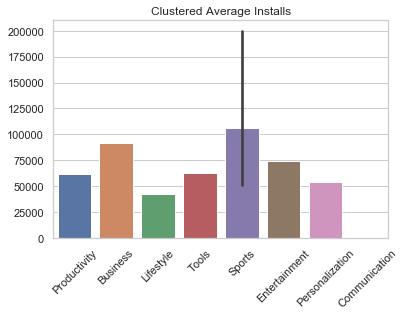

In [52]:
sns.barplot(evenlist2, install_mean_list)
plt.title('Clustered Average Installs')
plt.xticks(rotation=45)
plt.show();

In [50]:
evenlist2tuples

[('Group label', 'Installs'),
 ('Productivity', '#62161.69'),
 ('Business', '#92003.85'),
 ('Lifestyle', '#42111.11'),
 ('Tools', '#62551.99'),
 ('Sports', '#200000.00'),
 ('Sports', '#67307.69'),
 ('Entertainment', '#74178.53'),
 ('Sports', '#50928.57'),
 ('Personalization', '#53744.80'),
 ('Communication', '#1000.00')]

In [31]:
evenlist2 = testCluster(df_g_top10x100[['Rating', 'Reviews', 'Installs', 'Size']], n = 10, name = 'Label2', df_g=df_g_top10x100)

In [32]:
evenlist2

['Productivity',
 'Business',
 'Lifestyle',
 'Tools',
 'Sports',
 'Sports',
 'Entertainment',
 'Sports',
 'Personalization',
 'Communication']

In [243]:
evenlist

['Productivity',
 'Business',
 'Medical',
 'Tools',
 'Sports',
 'Sports',
 'Entertainment',
 'Sports',
 'Personalization',
 'Communication']

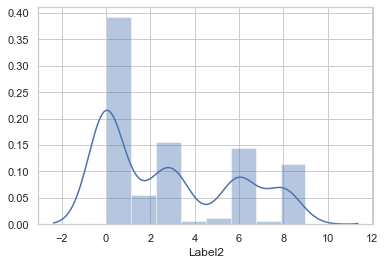

In [256]:
sns.distplot(df_g_top10x100['Label2'])

In [252]:
df_g_top10x100['Label2'].value_counts()

Int64Index([0, 3, 6, 8, 2, 1, 5, 4, 7, 9], dtype='int64')

In [296]:
df_g.Rating[:10]

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
5    4.4
6    3.8
7    4.1
8    4.4
9    4.7
Name: Rating, dtype: float64

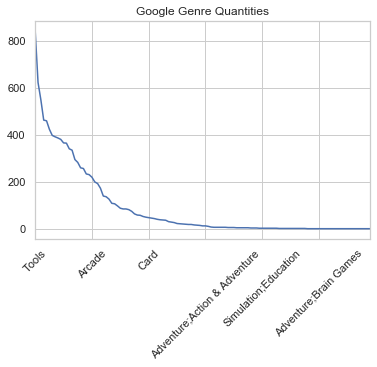

In [293]:
df_g.Genres.value_counts().plot()
plt.title('Google Genre Quantities')
plt.xticks(rotation=45)
plt.show();

# clustering apple by top 10

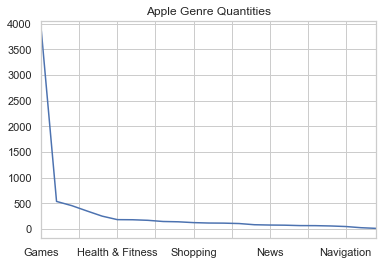

In [290]:
df_a.prime_genre.value_counts().plot()
plt.title('Apple Genre Quantities')
plt.show();

In [258]:
df_a.prime_genre.value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [56]:
df_a_top = df_a[(df_a.prime_genre == 'Games') |
     (df_a.prime_genre == 'Entertainment') |
     (df_a.prime_genre == 'Education') |
     (df_a.prime_genre == 'Photo & Video') |
     (df_a.prime_genre == 'Utilities') |
     (df_a.prime_genre == 'Health & Fitness') |
     (df_a.prime_genre == 'Productivity') |
     (df_a.prime_genre == 'Social Networking') |
     (df_a.prime_genre == 'Lifestyle') |
     (df_a.prime_genre == 'Music') |
     (df_a.prime_genre == 'Shopping') |
     (df_a.prime_genre == 'Sports') |
     (df_a.prime_genre == 'Book') |
     (df_a.prime_genre == 'Finance')
    ]

In [57]:
df_agames = df_a[df_a.prime_genre == 'Games'].sample(100)
df_aentertainment = df_a[df_a.prime_genre == 'Entertainment'].sample(100)
df_aeducation = df_a[df_a.prime_genre == 'Education'].sample(100)
df_aphoto = df_a[df_a.prime_genre == 'Photo & Video'].sample(100)
df_autil = df_a[df_a.prime_genre == 'Utilities'].sample(100)
df_ahealth = df_a[df_a.prime_genre == 'Health & Fitness'].sample(100)
df_aprod = df_a[df_a.prime_genre == 'Productivity'].sample(100)
df_asocial = df_a[df_a.prime_genre == 'Social Networking'].sample(100)
df_alife = df_a[df_a.prime_genre == 'Lifestyle'].sample(100)
df_amusic = df_a[df_a.prime_genre == 'Music'].sample(100)
df_ashop = df_a[df_a.prime_genre == 'Shopping'].sample(100)
df_asports = df_a[df_a.prime_genre == 'Sports'].sample(100)
df_abook = df_a[df_a.prime_genre == 'Book'].sample(100)
df_afinance = df_a[df_a.prime_genre == 'Finance'].sample(100)



In [58]:
df_a_top10x100 = pd.concat([df_agames, df_aentertainment, df_aeducation, df_aphoto, df_autil, df_ahealth,
                           df_aprod, df_asocial, df_alife, df_amusic, df_ashop, df_asports, df_abook, df_afinance])

In [59]:
df_a_top10x100.shape

(1400, 16)

In [60]:
df_a_top10x100.dtypes

id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

In [62]:
df_a_top10x100.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,1.400000e+03,1.400000e+03,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,7.982494e+08,1.044913e+08,1.869593,1.263464e+04,423.830714,3.247500,2.789286,36.722857,2.956429,6.035714,0.993571
std,2.892522e+08,1.473288e+08,8.843047,6.221444e+04,4962.635809,1.656532,1.996305,3.732521,2.254745,9.308708,0.079949
min,2.817961e+08,6.184960e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000
25%,5.190497e+08,3.301402e+07,0.000000,1.300000e+01,0.000000,2.500000,0.000000,37.000000,0.000000,1.000000,1.000000
50%,9.092870e+08,6.901043e+07,0.000000,2.435000e+02,9.000000,4.000000,3.500000,37.000000,4.000000,2.000000,1.000000
75%,1.065660e+09,1.195192e+08,1.990000,2.557000e+03,79.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,1.187128e+09,1.669449e+09,299.990000,1.126879e+06,117470.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [63]:
#rating_count_tot, user_rating, sup_devices.num, size_bytes
applelist = testCluster(df_a_top10x100[['rating_count_tot', 'user_rating', 'sup_devices.num', 'size_bytes']], n = 10, name = 'Label2', df_g=df_a_top10x100, genre='prime_genre')


In [64]:
applelist

['Utilities',
 'Shopping',
 'Games',
 'Games',
 'Games',
 'Education',
 'Lifestyle',
 'Games',
 'Book',
 'Education']

In [66]:
apple_install_means = []
for i in range(len(applelist)):
    apple_install_means.append(df_a_top10x100[df_a_top10x100.Label2 == i].rating_count_tot.mean())

3000000

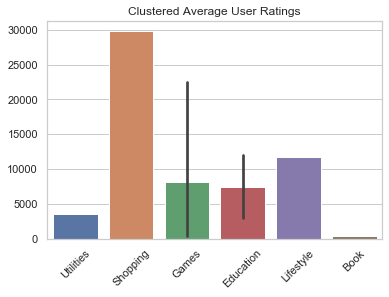

In [69]:
sns.barplot(applelist, apple_install_means)
plt.title('Clustered Average User Ratings')
plt.xticks(rotation=45)
plt.show();

In [282]:
applelist100 = testCluster(df_a_top10x100[['rating_count_tot', 'user_rating', 'sup_devices.num', 'size_bytes']], n = 100, name = 'Label8', df_g=df_a_top10x100, genre='prime_genre')



In [283]:
applelist100

['Education',
 'Book',
 'Photo & Video',
 'Shopping',
 'Utilities',
 'Health & Fitness',
 'Social Networking',
 'Health & Fitness',
 'Lifestyle',
 'Games',
 'Education',
 'Book',
 'Health & Fitness',
 'Games',
 'Social Networking',
 'Productivity',
 'Music',
 'Sports',
 'Sports',
 'Sports',
 'Games',
 'Entertainment',
 'Games',
 'Utilities',
 'Health & Fitness',
 'Finance',
 'Finance',
 'Health & Fitness',
 'Education',
 'Sports',
 'Health & Fitness',
 'Book',
 'Shopping',
 'Book',
 'Education',
 'Shopping',
 'Games',
 'Entertainment',
 'Book',
 'Sports',
 'Music',
 'Book',
 'Health & Fitness',
 'Education',
 'Utilities',
 'Photo & Video',
 'Education',
 'Utilities',
 'Games',
 'Entertainment',
 'Health & Fitness',
 'Shopping',
 'Education',
 'Education',
 'Productivity',
 'Games',
 'Games',
 'Book',
 'Lifestyle',
 'Productivity',
 'Education',
 'Music',
 'Education',
 'Utilities',
 'Games',
 'Photo & Video',
 'Entertainment',
 'Games',
 'Music',
 'Photo & Video',
 'Sports',
 'Games',


# apple clustering without sampling

In [285]:
appleunsample = testCluster(df_a[['rating_count_tot', 'user_rating', 'sup_devices.num', 'size_bytes']], n = 25, name = 'Label10', df_g=df_a, genre='prime_genre')



In [286]:
appleunsample

['Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games',
 'Games']

In [299]:
df_g[df_g['Genres'] == 'Games']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,ContentRatingValue,target,Label,LabelGenre,Label2,Top5,Top10,GenreNum,Top30,2Top10


In [306]:
df_g.Genres.values

array(['Art & Design', 'Art & Design;Pretend Play', 'Art & Design', ...,
       'Medical', 'Books & Reference', 'Lifestyle'], dtype=object)

In [307]:
for i in df_g.Genres.values:
    print(i)

Art & Design
Art & Design;Pretend Play
Art & Design
Art & Design
Art & Design;Creativity
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design;Creativity
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design;Action & Adventure
Art & Design
Art & Design
Art & Design;Creativity
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design;Creativity
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design;Creativity
Art & Design
Art & Design
Art & Design
Art & Design
Art & Design
Auto & Vehicles
Auto & Vehicles
Auto & Vehicles
Auto & Vehicles
Auto & Vehicles
Auto & Vehicles
Auto & Vehicles
Auto & Vehicles
Auto & Vehicles
Auto & Vehicles
Auto & Vehicles
Auto & Vehicles
Auto & Vehicles
Auto & Vehicles
Auto & Vehicles
Auto & Vehicles
Auto & Vehicles
Auto

Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local
Travel & Local;Action & Adventure
Travel & Local
Travel & Local
Travel & Local
Travel

Communication
Productivity
Business
Libraries & Demo
Education
Libraries & Demo
Adventure
Libraries & Demo
Libraries & Demo
Libraries & Demo
Adventure
Libraries & Demo
Libraries & Demo
Libraries & Demo
Tools
Lifestyle
Productivity
Productivity
Social
Card
Card
Education;Pretend Play
Casual
Strategy
Arcade
Education;Pretend Play
Arcade
Card
Finance
Casual
Casino
Entertainment
Education;Brain Games
Action
Entertainment
Card
Casino
Education;Pretend Play
Social
Libraries & Demo
Social
Lifestyle
Education;Pretend Play
Arcade
Role Playing
Action
Casino
Puzzle;Brain Games
Events
Photography
Casual
Action
Arcade;Action & Adventure
Travel & Local
Health & Fitness
Business
Medical
Medical
Lifestyle
Medical
Medical
Medical
Medical
Medical
Entertainment
Medical
Medical
Medical
Health & Fitness
Medical
Medical
Medical
Medical
Books & Reference
Medical
Health & Fitness
Lifestyle
Health & Fitness
Business
Casual
Medical
Simulation
Medical
Medical
Medical
Shopping
Medical
Medical
Entertainment
Health

Health & Fitness
Photography
Finance
Simulation
Books & Reference
Communication
Personalization
Travel & Local
Travel & Local
Productivity
Personalization
Books & Reference
Personalization
Personalization
Communication
Personalization
Business
Education
Travel & Local
Finance
Productivity
Entertainment
Education
Arcade
Trivia
Travel & Local
Business
Racing
Personalization
Educational
Social
Communication
Libraries & Demo
News & Magazines
Business
Business
Education
Trivia
Lifestyle
Tools
Trivia
Education
News & Magazines
Casual
Finance
News & Magazines
Business
Business
Business
Books & Reference
Education
Finance
Communication
Business
Lifestyle
Books & Reference
Finance
Lifestyle
Shopping
Entertainment
Business
Communication
Health & Fitness
Business
Social
Educational
Business
Business
Productivity
News & Magazines
Sports
Travel & Local
Business
Lifestyle
Maps & Navigation
Casual;Pretend Play
Business
Business
Maps & Navigation
Business
Tools
Shopping
Maps & Navigation
Maps & Naviga